In [201]:
# Import necessary libraries
import pandas as pd

In [202]:
# Path to the dataset
file_path = '/content/Accidental_Drug_Related_Deaths_2012-2021.csv'

In [203]:
# Step 1: Data Collection
# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
df.info()

# Display the first few rows of the dataset to understand its structure
print("\nPreview of the dataset:")
print(df.head())

# Step 2: Data Description
# List the columns and provide a description of the attributes
print("\nAttributes in the dataset:")
print(df.columns)

# Attributes description:
attributes_description = {
    'Date of Death': 'Indicates when the fatality occurred.',
    'Age': 'The age of the deceased at the time of death.',
    'Sex': 'Gender of the deceased (Male/Female).',
    'Race': 'Racial classification (e.g., Black, White, Asian).',
    'Ethnicity': 'Ethnic background (e.g., Hispanic, Non-Hispanic).',
    'Residence Details': 'City, county, and state where the deceased resided.',
    'Injury Details': 'Location details where the injury occurred leading to death.',
    'Death Details': 'Location details where the death was officially recorded.',
    'Substance Involvement': 'Information on specific substances involved in the death (e.g., Heroin, Cocaine, Fentanyl, etc.).'
}

# Display the attribute descriptions
print("\nAttributes Description:")
for column, description in attributes_description.items():
    if column in df.columns:
        print(f"{column}: {description}")
    else:
        print(f"{column}: Not found in the dataset")

# Checking for missing values in each column
print("\nMissing Values in the dataset:")
print(df.isnull().sum())

# Step 3: Data Exploration (Optional for a quick overview)
# Statistical summary of the dataset (for numerical columns)
print("\nStatistical Summary:")
print(df.describe())

# Display the number of unique values in each categorical column (e.g., Sex, Race, Ethnicity)
print("\nUnique Values in Categorical Columns:")
for col in ['Sex', 'Race', 'Ethnicity', 'Substance Involvement']:
    if col in df.columns:
        print(f"{col} unique values: {df[col].unique()}")
    else:
        print(f"{col} is not found in the dataset.")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           9202 non-null   object 
 1   Date Type                      9202 non-null   object 
 2   Age                            9200 non-null   float64
 3   Sex                            9194 non-null   object 
 4   Race                           9178 non-null   object 
 5   Ethnicity                      1287 non-null   object 
 6   Residence City                 8813 non-null   object 
 7   Residence County               8160 non-null   object 
 8   Residence State                7426 non-null   object 
 9   Injury City                    9024 non-null   object 
 10  Injury County                  5914 non-null   object 
 11  Injury State                   6290 non-null   object 
 12  Injury Place               

In [204]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/Accidental_Drug_Related_Deaths_2012-2021.csv'
df = pd.read_csv(file_path)

# Function to fill missing values randomly from existing values in the column
def fill_missing_randomly(df, column):
    if column in df.columns:
        missing_indices = df[column].isnull()
        available_values = df[column].dropna()
        if not available_values.empty:
            # Randomly sample from available values
            df.loc[missing_indices, column] = np.random.choice(available_values, size=missing_indices.sum(), replace=True)
        else:
            print(f"No available values to fill missing data for column: {column}")
    else:
        print(f"Column '{column}' does not exist in the dataset.")

# Step 1: Fill numerical columns with random values from the column itself
numerical_columns = ['Age']
for col in numerical_columns:
    fill_missing_randomly(df, col)

# Step 2: Fill categorical columns with random values from the column itself
categorical_columns = [
    'Sex', 'Race', 'Ethnicity', 'Residence City', 'Residence County', 'Residence State',
    'Injury City', 'Injury County', 'Injury State', 'Injury Place', 'Description of Injury',
    'Death City', 'Death County', 'Death State', 'Location', 'Location if Other',
    'Cause of Death', 'Manner of Death', 'Other Significant Conditions'
]

for col in categorical_columns:
    fill_missing_randomly(df, col)

# Step 3: Fill geo-coded columns with random values from the column itself
geo_columns = ['ResidenceCityGeo', 'InjuryCityGeo', 'DeathCityGeo']
for col in geo_columns:
    fill_missing_randomly(df, col)

# Step 4: Save the dataset with randomly filled missing values
cleaned_file_path = 'cleaned_accidental_drug_related_deaths_randomly_filled.csv'
df.to_csv(cleaned_file_path, index=False)

print("Missing values filled randomly and cleaned dataset saved.")

Column 'Other Significant Conditions' does not exist in the dataset.
Missing values filled randomly and cleaned dataset saved.


In [205]:
import pandas as pd

# Load the dataset
file_path = '/content/cleaned_accidental_drug_related_deaths_randomly_filled.csv'
df = pd.read_csv(file_path)

# List of drug-related columns (adjust based on the actual column names in your dataset)
drug_columns = [
    'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone',
    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
    'Methadone', 'Meth/Amphetamine', 'Amphet', 'Tramad',
    'Hydromorphone', 'Morphine (Not Heroin)', 'Xylazine',
    'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine',
    'Other Opioid', 'Any Opioid', 'Other'
]

# Initialize a dictionary to store death counts for each drug
drug_death_counts = {}

# Count occurrences where the value is 'Y' for each drug-related column
for drug in drug_columns:
    if drug in df.columns:
        # Count the number of occurrences where the value is 'Y'
        drug_death_counts[drug] = (df[drug] == 'Y').sum()

# Convert the dictionary to a DataFrame for better display
drug_death_counts_df = pd.DataFrame(list(drug_death_counts.items()), columns=['Drug', 'Death Count'])

# Display the death counts for each drug
print("Death counts for each drug (with 'Y' indicating drug involvement):")
print(drug_death_counts_df)

# Optionally, save the drug death counts to a CSV file
output_file_path = '/content/drug_death_counts_Y.csv'
drug_death_counts_df.to_csv(output_file_path, index=False)

print(f"Drug death counts saved to {output_file_path}")


Death counts for each drug (with 'Y' indicating drug involvement):
                     Drug  Death Count
0                  Heroin         3347
1                 Cocaine         3171
2                Fentanyl         5670
3       Fentanyl Analogue          728
4               Oxycodone          877
5             Oxymorphone          148
6                 Ethanol         2469
7             Hydrocodone          155
8          Benzodiazepine         2238
9               Methadone          814
10       Meth/Amphetamine          127
11                 Amphet          285
12                 Tramad          258
13          Hydromorphone           56
14  Morphine (Not Heroin)           46
15               Xylazine          441
16             Gabapentin          182
17             Opiate NOS          119
18   Heroin/Morph/Codeine         1952
19           Other Opioid           90
20             Any Opioid         6273
21                  Other            0
Drug death counts saved to /content/

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           9202 non-null   object 
 1   Date Type                      9202 non-null   object 
 2   Age                            9202 non-null   float64
 3   Sex                            9202 non-null   object 
 4   Race                           9202 non-null   object 
 5   Ethnicity                      9202 non-null   object 
 6   Residence City                 9202 non-null   object 
 7   Residence County               9202 non-null   object 
 8   Residence State                9202 non-null   object 
 9   Injury City                    9202 non-null   object 
 10  Injury County                  9202 non-null   object 
 11  Injury State                   9202 non-null   object 
 12  Injury Place                   9202 non-null   o

### Deleting Irrelevant Columns

In [207]:
# List of columns that are unnecessary based on the analysis objectives
columns_to_drop = [
    'Date Type', 'Description of Injury', 'Location', 'Location if Other',
    'Heroin death certificate (DC)', 'ResidenceCityGeo', 'InjuryCityGeo',  'DeathCityGeo',
    # Adding the requested columns
    'Residence City', 'Residence County',
    'Injury City', 'Injury County', 'Injury State', 'Injury Place',
    'Death City', 'Death County', 'Death State',
    # Adding 'Cause of Death' and 'Manner of Death'
    'Cause of Death', 'Manner of Death'
]

# Drop unnecessary columns
df_cleaned = df.drop(columns=columns_to_drop)

# Display the columns in the cleaned dataset to verify
print("Columns after dropping unnecessary data:")
print(df_cleaned.columns)


Columns after dropping unnecessary data:
Index(['Date', 'Age', 'Sex', 'Race', 'Ethnicity', 'Residence State',
       'Other Significant Conditions ', 'Heroin', 'Cocaine', 'Fentanyl',
       'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine',
       'Other Opioid', 'Any Opioid', 'Other'],
      dtype='object')


In [208]:
# Example: Checking if 'Date' is in the future (dates cannot be after today's date)
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
from datetime import datetime
today = datetime.today()

# Check for any death dates in the future (logical inconsistency)
future_dates = df_cleaned[df_cleaned['Date'] > today]
print(f"Number of entries with future dates: {future_dates.shape[0]}")

# Remove rows with future dates if found
df_cleaned = df_cleaned[df_cleaned['Date'] <= today]

Number of entries with future dates: 0


In [209]:
from scipy import stats
### 3. Outlier Treatment

# Detecting and treating outliers in 'Age' using Z-score
if 'Age' in df_cleaned.columns:
    z_scores = stats.zscore(df_cleaned['Age'])
    abs_z_scores = np.abs(z_scores)
    # Define a threshold for Z-score (e.g., Z-score > 3)
    age_outliers = df_cleaned[abs_z_scores > 3]
    print(f"Number of outliers in Age using Z-score: {age_outliers.shape[0]}")
    # Optionally, remove these outliers
    df_cleaned = df_cleaned[abs_z_scores <= 3]

# Detecting and treating outliers in 'Age' using IQR (Interquartile Range)
if 'Age' in df_cleaned.columns:
    Q1 = df_cleaned['Age'].quantile(0.25)
    Q3 = df_cleaned['Age'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    age_outliers_iqr = df_cleaned[(df_cleaned['Age'] < lower_bound) | (df_cleaned['Age'] > upper_bound)]
    print(f"Number of outliers in Age using IQR: {age_outliers_iqr.shape[0]}")
    # Optionally, remove these outliers
    df_cleaned = df_cleaned[(df_cleaned['Age'] >= lower_bound) & (df_cleaned['Age'] <= upper_bound)]

Number of outliers in Age using Z-score: 4
Number of outliers in Age using IQR: 0


In [210]:
# List of substance-related columns
substance_columns = [
    'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone',
    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
    'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
    'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'Other Opioid', 'Any Opioid', 'Other'
]

# Replace missing or blank values with 'N' in substance-related columns
df_cleaned[substance_columns] = df_cleaned[substance_columns].fillna('N').replace('', 'N')

# Display the updated columns to verify changes
print(df_cleaned[substance_columns].head())

  Heroin Cocaine Fentanyl Fentanyl Analogue Oxycodone Oxymorphone Ethanol  \
0      N       Y        N                 N         N           N       N   
1      Y       N        N                 N         N           N       N   
2      Y       N        N                 N         N           N       N   
3      Y       N        N                 N         N           N       N   
4      N       N        Y                 N         N           N       N   

  Hydrocodone Benzodiazepine Methadone Meth/Amphetamine Amphet Tramad  \
0           N              N         N                N      N      N   
1           N              N         N                N      N      N   
2           N              N         N                N      N      N   
3           N              N         N                N      N      N   
4           N              N         N                N      N      N   

  Hydromorphone Morphine (Not Heroin) Xylazine Gabapentin Opiate NOS  \
0             N           

In [212]:
# List of substance-related columns
substance_columns = [
    'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone',
    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
    'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
    'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'Other Opioid', 'Any Opioid', 'Other'
]

# Initialize an empty dictionary to store the count of 'Y' and 'N' for each substance
substance_counts = {}

# Loop through each substance column and count only 'Y' and 'N'
for col in substance_columns:
    if col in df_cleaned.columns:
        # Filter only 'Y' and 'N' values
        valid_values = df_cleaned[col].isin(['Y', 'N'])

        # Count the number of 'Y' and 'N' values for each column
        substance_counts[col] = df_cleaned.loc[valid_values, col].value_counts()

# Convert the dictionary to a DataFrame for easier display
substance_counts_df = pd.DataFrame(substance_counts).T  # Transpose for better readability
substance_counts_df = substance_counts_df.fillna(0)  # Fill missing counts with 0 (in case there are no 'Y' or 'N' values)

# Display the count of 'Y' and 'N' for each substance
print("Count of 'Y' (Yes) and 'N' (No) for each substance:")
print(substance_counts_df)

# Save the DataFrame to a CSV file
df_cleaned.to_csv("test.csv", index=True)

print("Data saved to 'test.csv'")

Count of 'Y' (Yes) and 'N' (No) for each substance:
                            N       Y
Heroin                 5852.0  3346.0
Cocaine                6028.0  3170.0
Fentanyl               3528.0  5668.0
Fentanyl Analogue      8470.0   728.0
Oxycodone              8322.0   876.0
Oxymorphone            9050.0   148.0
Ethanol                6729.0  2468.0
Hydrocodone            9043.0   155.0
Benzodiazepine         6960.0  2238.0
Methadone              8384.0   814.0
Meth/Amphetamine       9071.0   127.0
Amphet                 8913.0   285.0
Tramad                 8940.0   258.0
Hydromorphone          9142.0    56.0
Morphine (Not Heroin)  9149.0    46.0
Xylazine               8757.0   441.0
Gabapentin             9016.0   182.0
Opiate NOS             9079.0   119.0
Heroin/Morph/Codeine   7247.0  1951.0
Other Opioid           9108.0    90.0
Any Opioid             2927.0  6271.0
Other                  8545.0     0.0
Data saved to 'test.csv'


In [156]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9198 entries, 0 to 9201
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           9198 non-null   datetime64[ns]
 1   Age                            9198 non-null   float64       
 2   Sex                            9198 non-null   object        
 3   Race                           9198 non-null   object        
 4   Ethnicity                      9198 non-null   object        
 5   Residence State                9198 non-null   object        
 6   Other Significant Conditions   813 non-null    object        
 7   Heroin                         9198 non-null   object        
 8   Cocaine                        9198 non-null   object        
 9   Fentanyl                       9198 non-null   object        
 10  Fentanyl Analogue              9198 non-null   object        
 11  Oxycodone             

In [157]:
# Loop through each column in the DataFrame and get the unique values
for col in df_cleaned.columns:
    unique_values = df_cleaned[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print(f"Number of unique values: {len(unique_values)}")
    print('-' * 50)

Unique values in 'Date':
<DatetimeArray>
['2012-05-29 00:00:00', '2012-06-27 00:00:00', '2014-03-24 00:00:00',
 '2014-12-31 00:00:00', '2016-01-16 00:00:00', '2017-06-13 00:00:00',
 '2015-10-20 00:00:00', '2017-02-02 00:00:00', '2018-07-03 00:00:00',
 '2013-05-08 00:00:00',
 ...
 '2021-12-05 00:00:00', '2021-11-30 00:00:00', '2021-12-13 00:00:00',
 '2021-12-23 00:00:00', '2021-11-28 00:00:00', '2021-12-27 00:00:00',
 '2021-12-15 00:00:00', '2021-12-31 00:00:00', '2021-09-21 00:00:00',
 '2021-03-15 00:00:00']
Length: 3162, dtype: datetime64[ns]
Number of unique values: 3162
--------------------------------------------------
Unique values in 'Age':
[37. 28. 26. 41. 57. 64. 33. 23. 54. 45. 21. 48. 30. 49. 39. 44. 42. 43.
 46. 50. 35. 14. 31. 40. 68. 47. 51. 65. 52. 25. 59. 27. 34. 38. 53. 56.
 24. 36. 22. 63. 70. 60. 29. 32. 55. 61. 67. 19. 58. 66. 62. 20. 18. 69.
 73. 72. 71. 16. 74. 17. 77. 75. 80. 15. 78.]
Number of unique values: 65
--------------------------------------------------
U

# Exploratory Data Analysis

## Summary Statistics

## Univariate Analysis

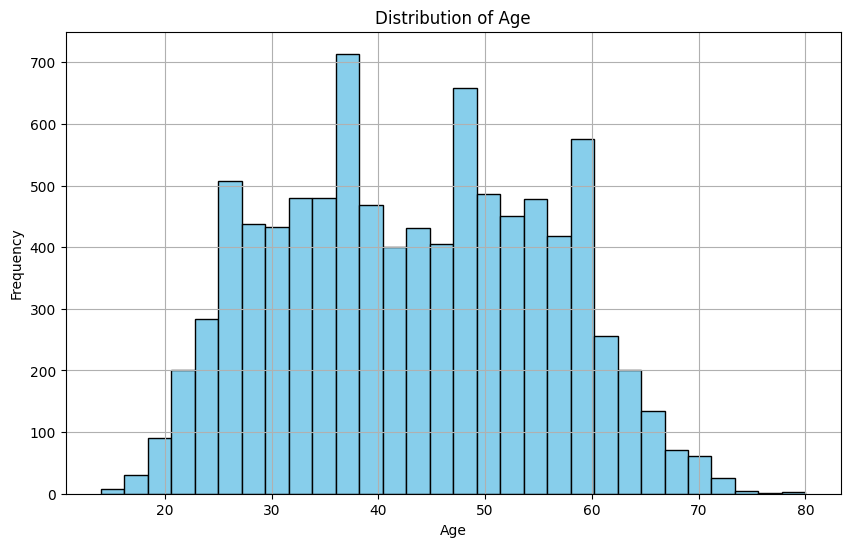

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


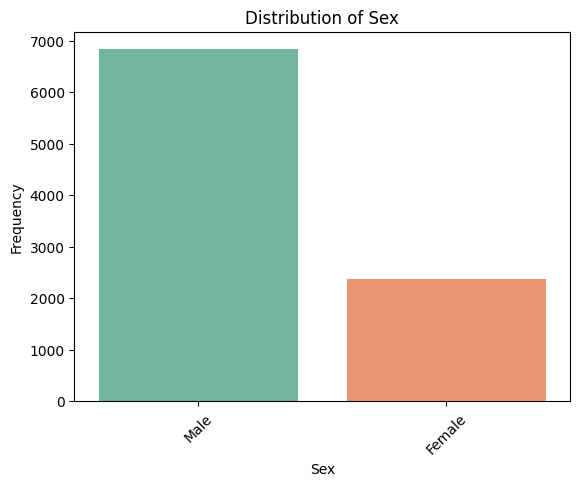

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


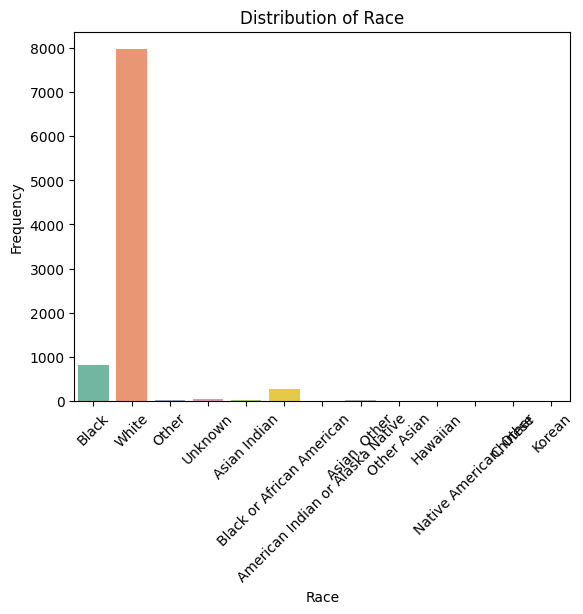

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


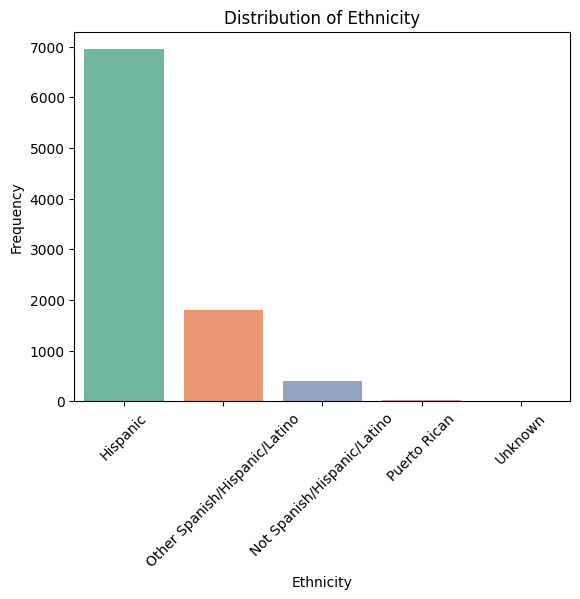

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


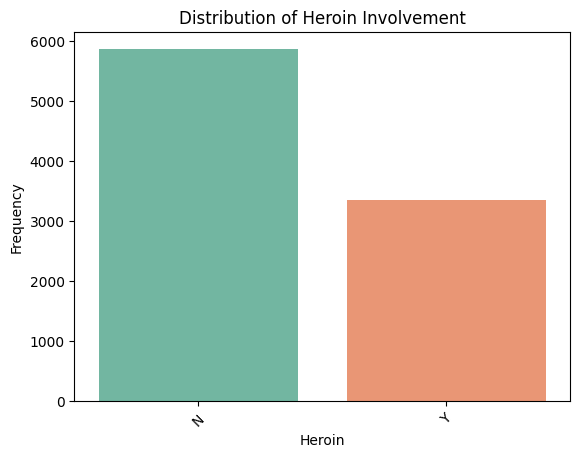

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


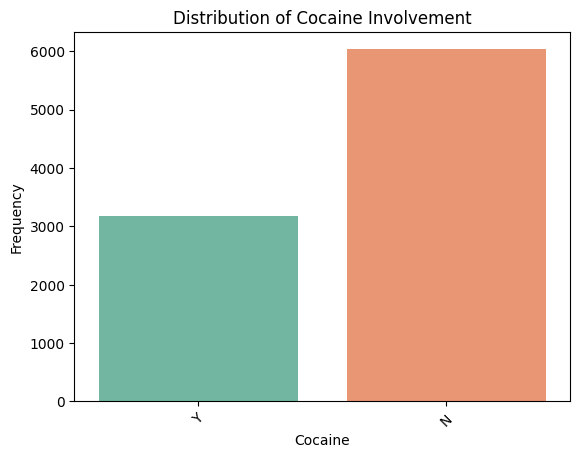

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


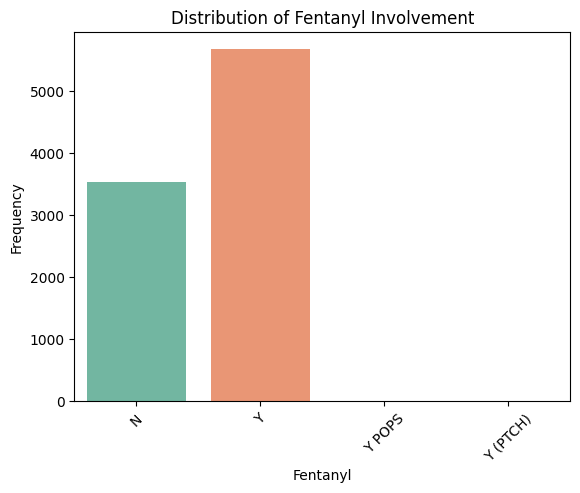

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


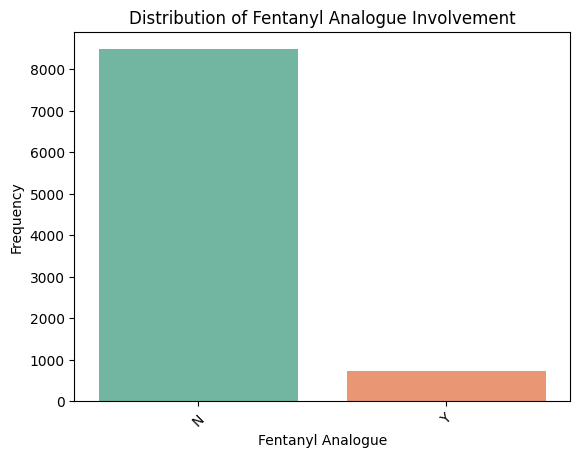

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


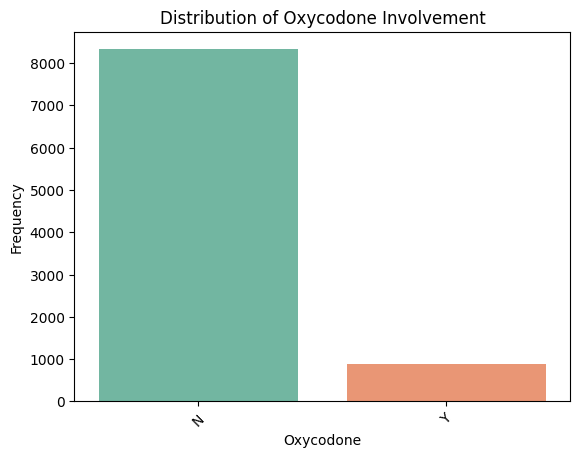

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


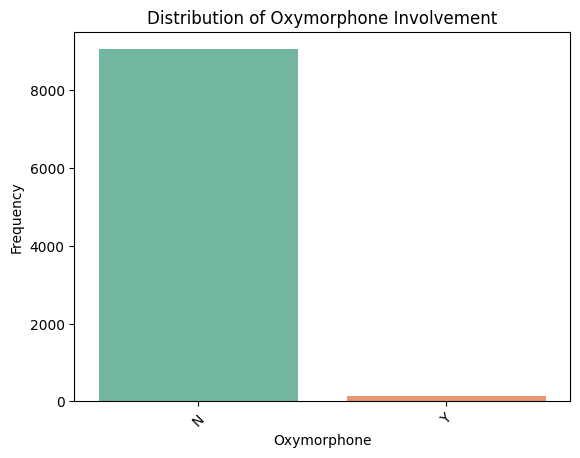

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


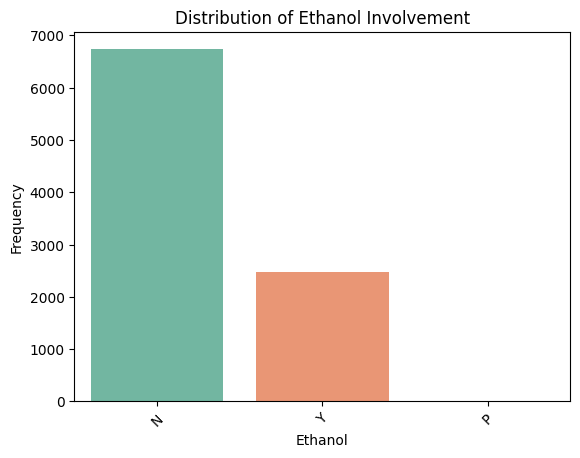

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


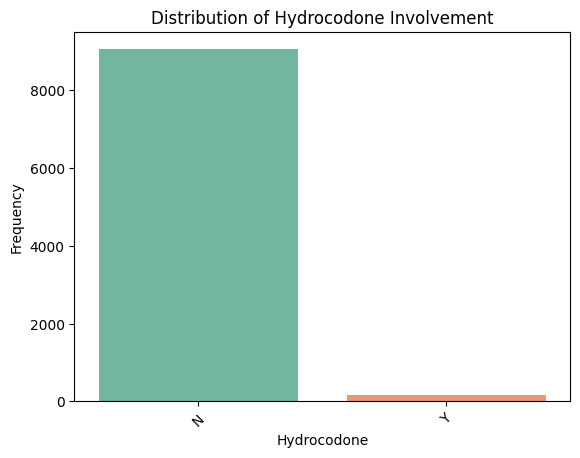

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


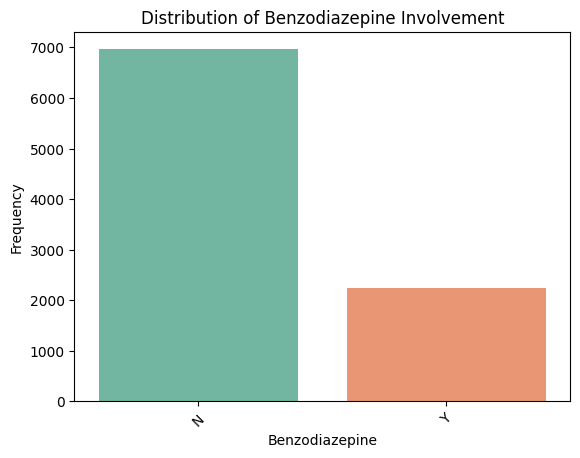

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


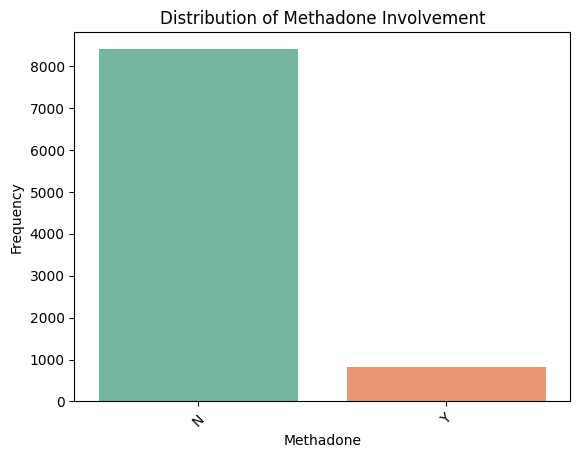

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


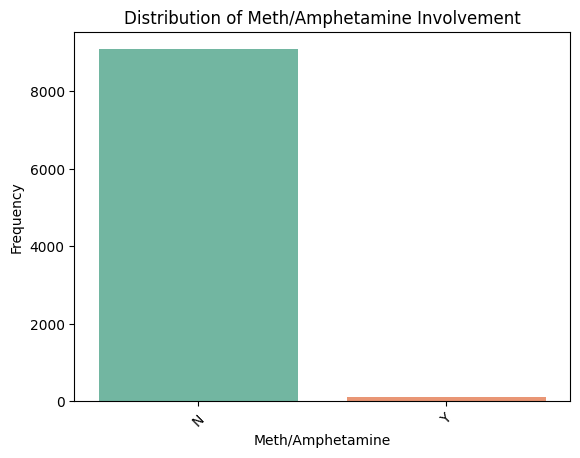

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


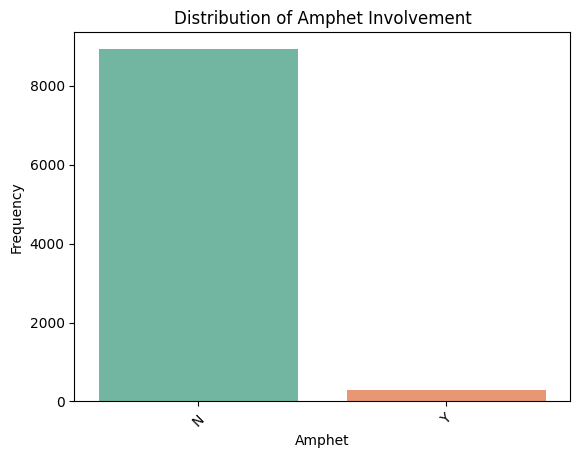

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


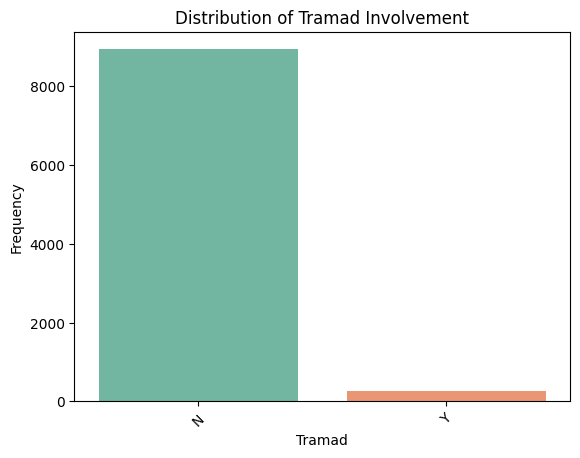

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


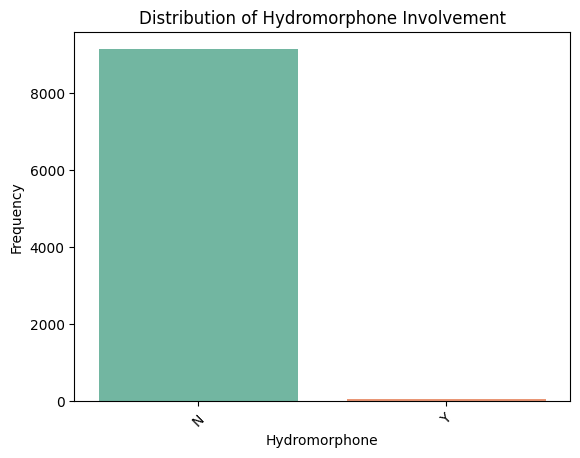

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


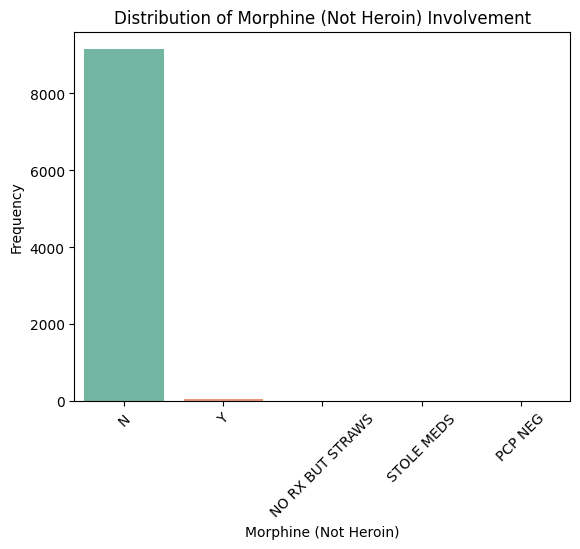

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


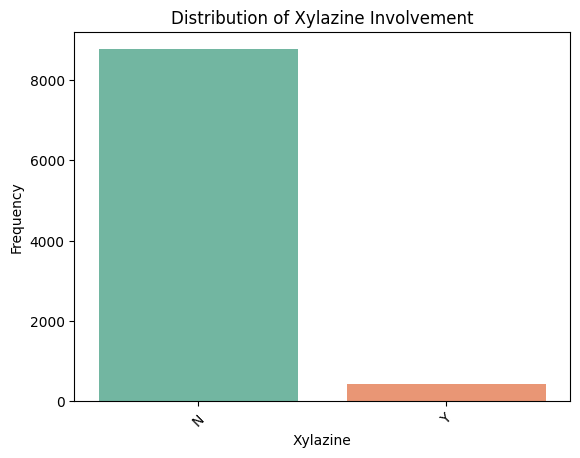

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


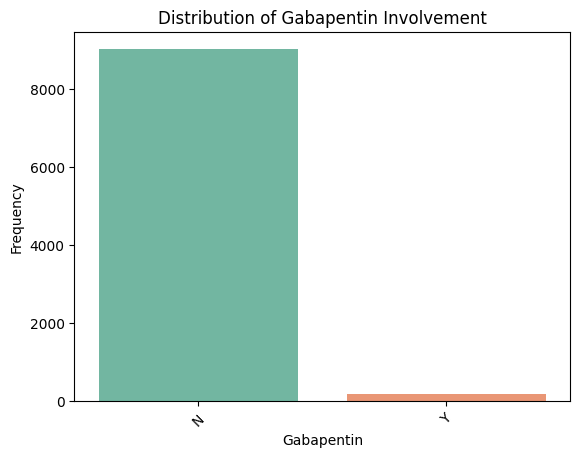

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


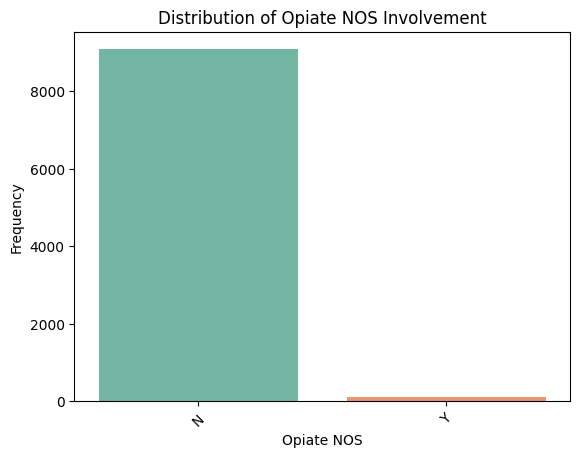

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


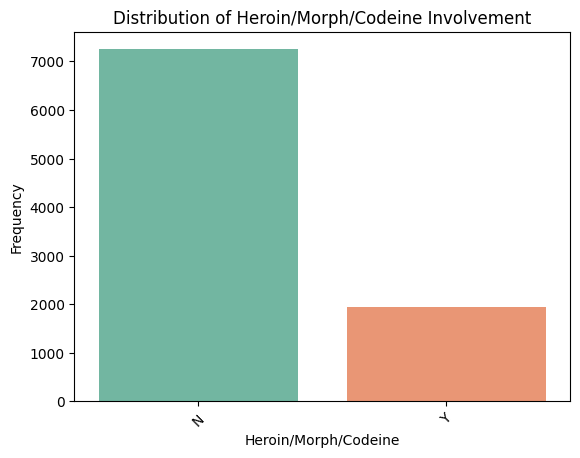

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


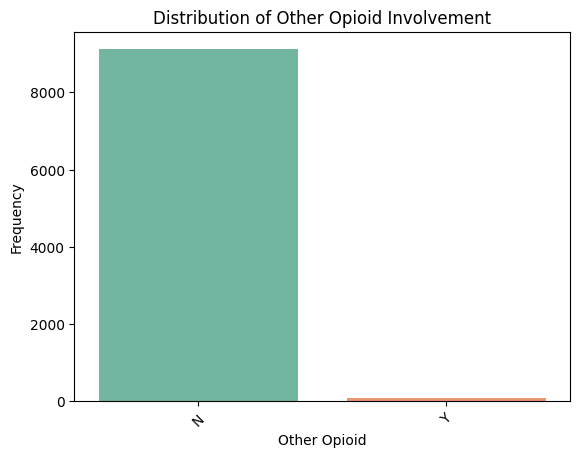

<ipython-input-158-32844f938ea9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


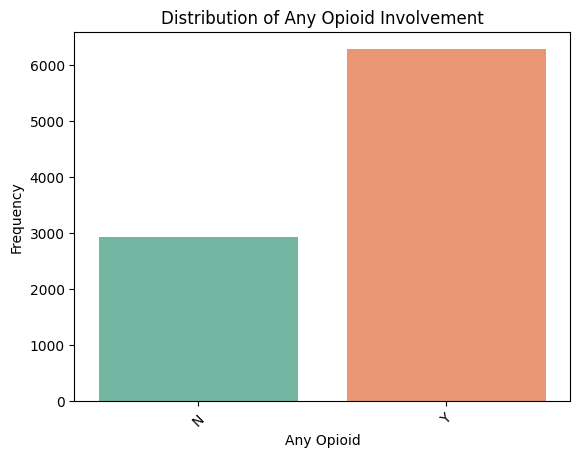

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better visibility
plt.figure(figsize=(10, 6))

### 1. Histogram for Numerical Variable 'Age'

# Plotting histogram for 'Age'
plt.hist(df_cleaned['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 2. Bar Chart for Categorical Variables

# Function to create a bar chart for categorical variables
def plot_bar_chart(column_name, title):
    sns.countplot(x=column_name, data=df_cleaned, palette='Set2')
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Bar chart for 'Sex'
plot_bar_chart('Sex', 'Distribution of Sex')

# Bar chart for 'Race'
plot_bar_chart('Race', 'Distribution of Race')

# Bar chart for 'Ethnicity'
plot_bar_chart('Ethnicity', 'Distribution of Ethnicity')

### 3. Bar Charts for Substance Involvement

# List of substance-related columns
substance_columns = [
    'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone',
    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
    'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
    'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'Other Opioid', 'Any Opioid'
]

# Plotting bar charts for each substance column to show the involvement in deaths
for col in substance_columns:
    plot_bar_chart(col, f'Distribution of {col} Involvement')


<ipython-input-159-d4c5814ca4b7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


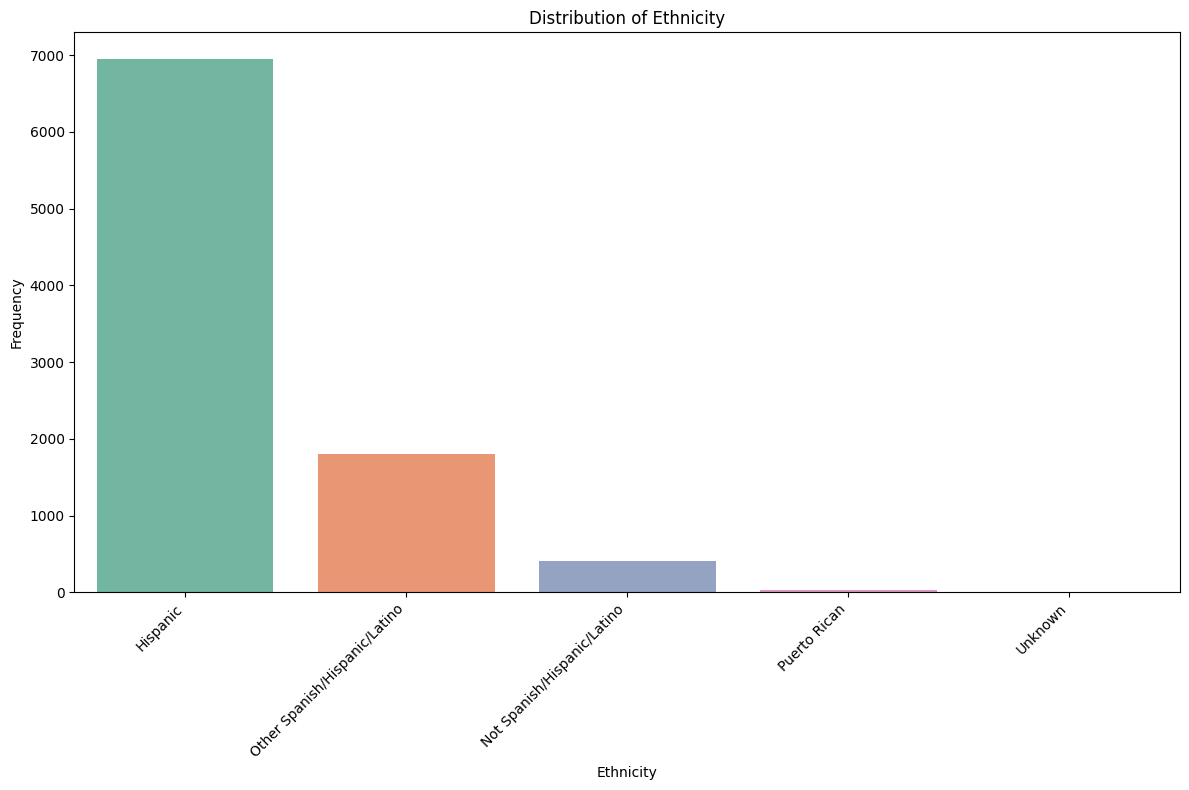

<ipython-input-159-d4c5814ca4b7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df_cleaned, palette='Set2')


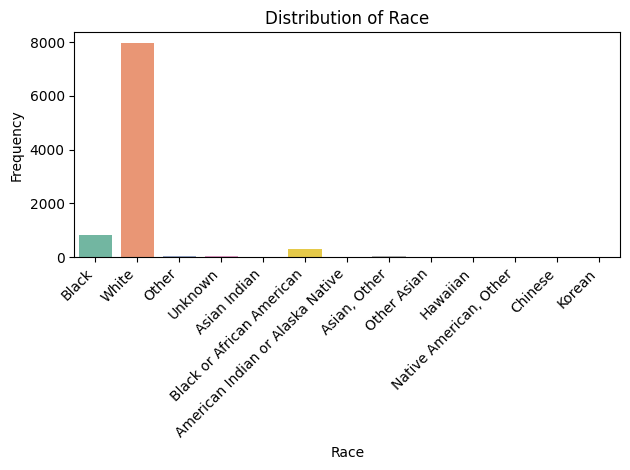

<ipython-input-159-d4c5814ca4b7>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=df_cleaned, palette='Set2')


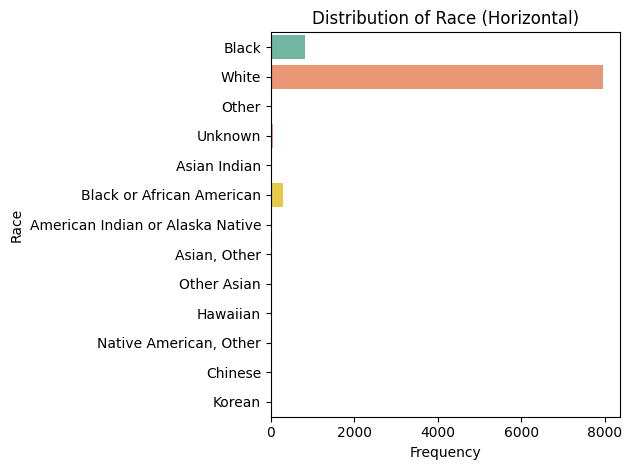

<ipython-input-159-d4c5814ca4b7>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=df_cleaned, palette='Set2')


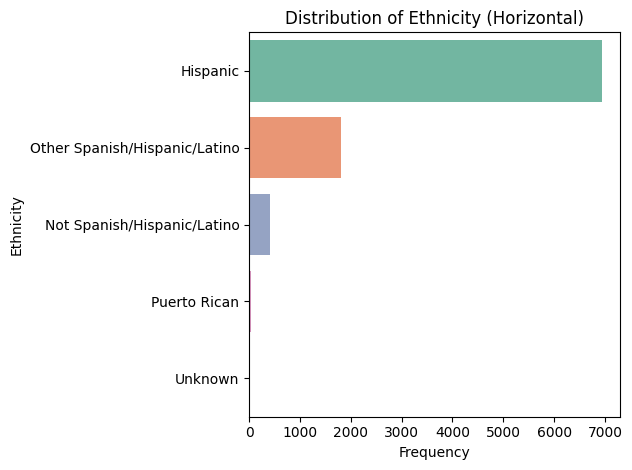

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better visibility
plt.figure(figsize=(12, 8))

# Function to create a better bar chart for categorical variables
def plot_better_bar_chart(column_name, title):
    sns.countplot(x=column_name, data=df_cleaned, palette='Set2')
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align labels
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

# Bar chart for 'Ethnicity' with improved readability
plot_better_bar_chart('Ethnicity', 'Distribution of Ethnicity')

# Bar chart for 'Race' with improved readability
plot_better_bar_chart('Race', 'Distribution of Race')

# Optionally, use horizontal bar charts to improve label readability for longer category names
def plot_horizontal_bar_chart(column_name, title):
    sns.countplot(y=column_name, data=df_cleaned, palette='Set2')
    plt.title(title)
    plt.ylabel(column_name)
    plt.xlabel('Frequency')
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

# Horizontal bar chart for 'Race'
plot_horizontal_bar_chart('Race', 'Distribution of Race (Horizontal)')

# Horizontal bar chart for 'Ethnicity'
plot_horizontal_bar_chart('Ethnicity', 'Distribution of Ethnicity (Horizontal)')

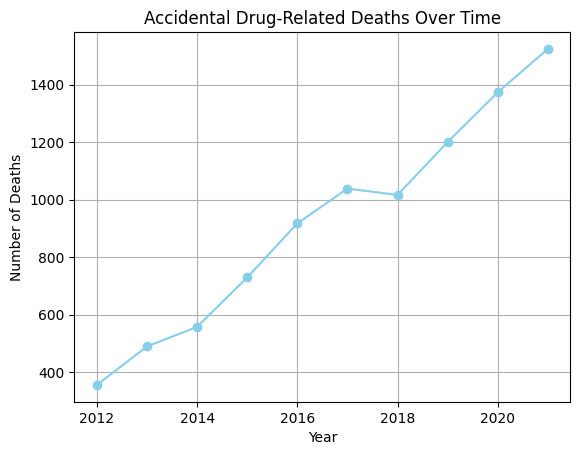

In [160]:
# Convert 'Date' column to datetime if it's not already
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Extract year from the date
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Plot line chart for deaths over time
deaths_per_year = df_cleaned.groupby('Year').size()
deaths_per_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Accidental Drug-Related Deaths Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

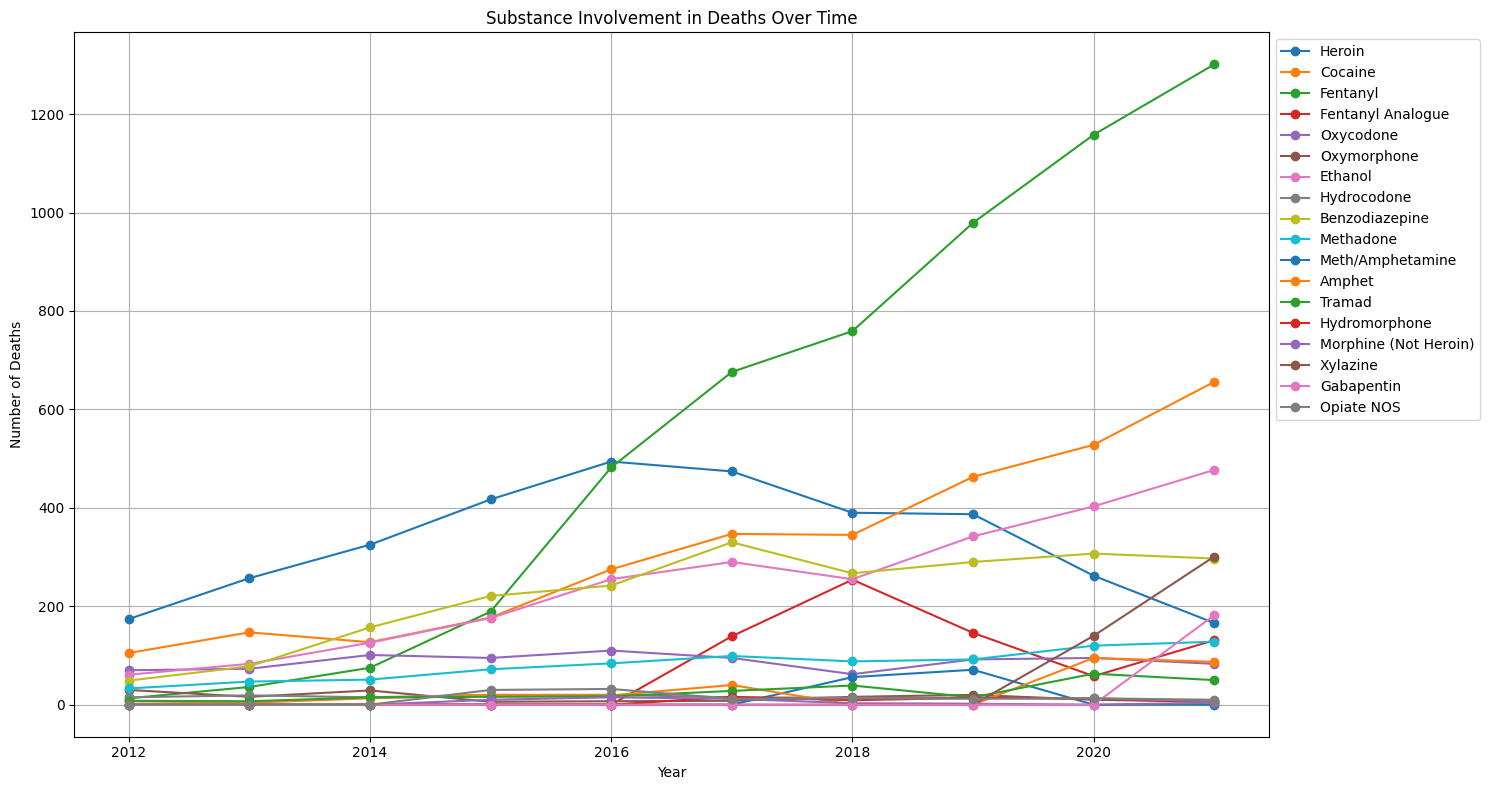

In [161]:
import matplotlib.pyplot as plt

# List of all substance-related columns
substance_columns = [
    'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone',
    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
    'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
    'Xylazine', 'Gabapentin', 'Opiate NOS'
]

# Ensure 'Year' column exists
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Group by year and sum the number of 'Y' values for each substance
deaths_by_substance_year = df_cleaned.groupby('Year')[substance_columns].apply(lambda x: (x == 'Y').sum())

# Plot all substances on a larger plot
plt.figure(figsize=(15, 8))  # Increase the figure size for better visibility
deaths_by_substance_year.plot(kind='line', marker='o', ax=plt.gca())  # Use the same axis for all lines
plt.title('Substance Involvement in Deaths Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))  # Move the legend outside of the plot for better readability
plt.grid(True)
plt.tight_layout()  # Adjust the layout to fit everything properly
plt.show()


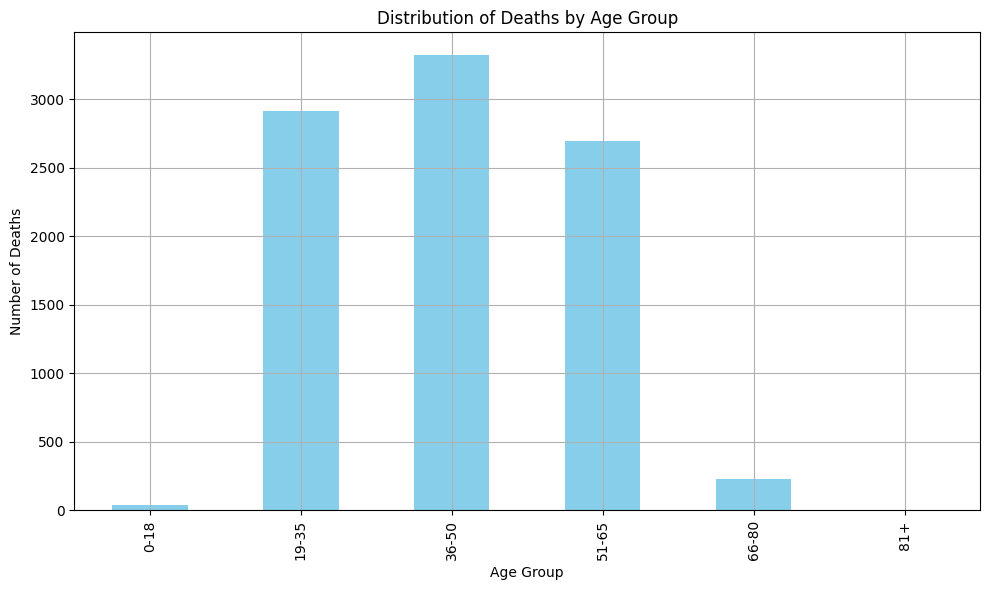

In [162]:
# Create age groups
df_cleaned['Age Group'] = pd.cut(df_cleaned['Age'], bins=[0, 18, 35, 50, 65, 80, 100], labels=['0-18', '19-35', '36-50', '51-65', '66-80', '81+'])

# Count deaths by age group
age_group_counts = df_cleaned['Age Group'].value_counts().sort_index()

# Plot the distribution of deaths by age group
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

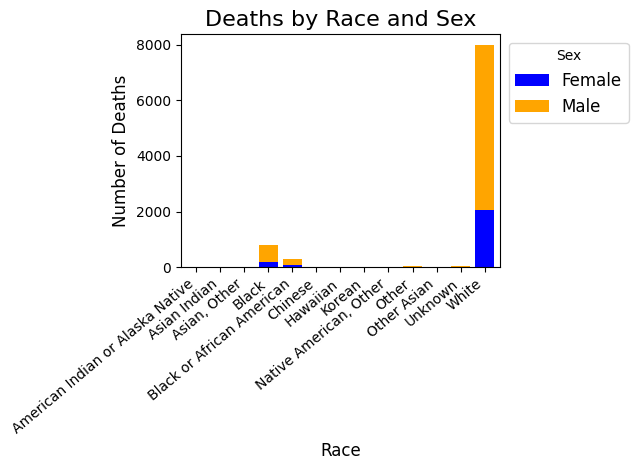

In [163]:
import matplotlib.pyplot as plt

# Group by 'Race' and 'Sex'
deaths_by_race_sex = df_cleaned.groupby(['Race', 'Sex']).size().unstack()

# Plot stacked bar chart with adjustments for better readability
plt.figure(figsize=(14, 8))  # Increase figure size for better label fitting
deaths_by_race_sex.plot(kind='bar', stacked=True, color=['blue', 'orange'], width=0.8)

# Add title and labels
plt.title('Deaths by Race and Sex', fontsize=16)
plt.xlabel('Race', fontsize=12)  # Decrease font size of x-axis label
plt.ylabel('Number of Deaths', fontsize=12)

# Adjust x-axis labels (moderate rotation and increased font size)
plt.xticks(rotation=40, ha='right', fontsize=10)  # Reduce rotation and font size

# Move the legend outside the plot to avoid overlap
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=12)

# Adjust layout so plot doesn't get squished
plt.tight_layout()

# Show plot
plt.show()


In [164]:
# Print unique values for each substance-related column to identify any unexpected values
for column in substance_columns:
    print(f"Unique values in '{column}': {df_cleaned[column].unique()}")

Unique values in 'Heroin': ['N' 'Y']
Unique values in 'Cocaine': ['Y' 'N']
Unique values in 'Fentanyl': ['N' 'Y' 'Y POPS' 'Y (PTCH)']
Unique values in 'Fentanyl Analogue': ['N' 'Y']
Unique values in 'Oxycodone': ['N' 'Y']
Unique values in 'Oxymorphone': ['N' 'Y']
Unique values in 'Ethanol': ['N' 'Y' 'P']
Unique values in 'Hydrocodone': ['N' 'Y']
Unique values in 'Benzodiazepine': ['N' 'Y']
Unique values in 'Methadone': ['N' 'Y']
Unique values in 'Meth/Amphetamine': ['N' 'Y']
Unique values in 'Amphet': ['N' 'Y']
Unique values in 'Tramad': ['N' 'Y']
Unique values in 'Hydromorphone': ['N' 'Y']
Unique values in 'Morphine (Not Heroin)': ['N' 'Y' 'NO RX BUT STRAWS' 'STOLE MEDS' 'PCP NEG']
Unique values in 'Xylazine': ['N' 'Y']
Unique values in 'Gabapentin': ['N' 'Y']
Unique values in 'Opiate NOS': ['N' 'Y']


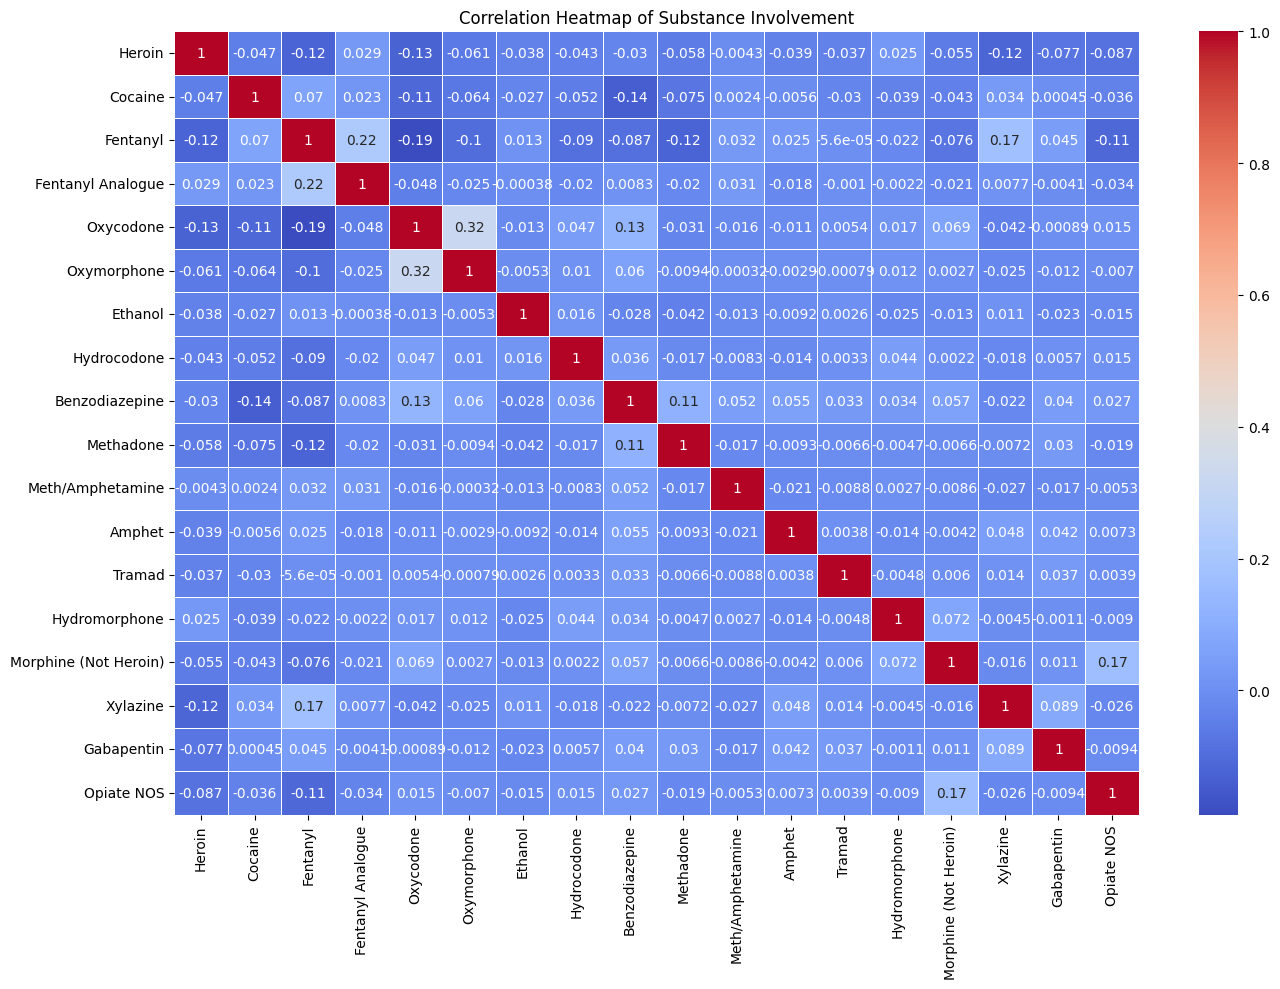

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of substance-related columns with specific non-binary values to handle
substance_columns = [
    'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone',
    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
    'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
    'Xylazine', 'Gabapentin', 'Opiate NOS'
]

# Step 1: Replace specific non-binary values in columns
df_cleaned['Fentanyl'] = df_cleaned['Fentanyl'].replace({'Y POPS': 'Y', 'Y (PTCH)': 'Y'})
df_cleaned['Ethanol'] = df_cleaned['Ethanol'].replace({'P': 'Y'})
df_cleaned['Morphine (Not Heroin)'] = df_cleaned['Morphine (Not Heroin)'].replace({
    'NO RX BUT STRAWS': 'Y', 'STOLE MEDS': 'Y', 'PCP NEG': 'N'
})

# Step 2: Convert all 'Y' to 1 and 'N' to 0 for binary representation
df_cleaned_binary = df_cleaned[substance_columns].replace({'Y': 1, 'N': 0})

# Step 3: Calculate the correlation matrix
correlation_matrix = df_cleaned_binary.corr()

# Step 4: Plot the heatmap for correlations between substances
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Substance Involvement')
plt.tight_layout()
plt.show()


Age                               float64
Heroin                              int64
Cocaine                             int64
Fentanyl                            int64
Sex_Male                             bool
Race_Asian Indian                    bool
Race_Asian, Other                    bool
Race_Black                           bool
Race_Black or African American       bool
Race_Chinese                         bool
Race_Hawaiian                        bool
Race_Korean                          bool
Race_Native American, Other          bool
Race_Other                           bool
Race_Other Asian                     bool
Race_Unknown                         bool
Race_White                           bool
dtype: object


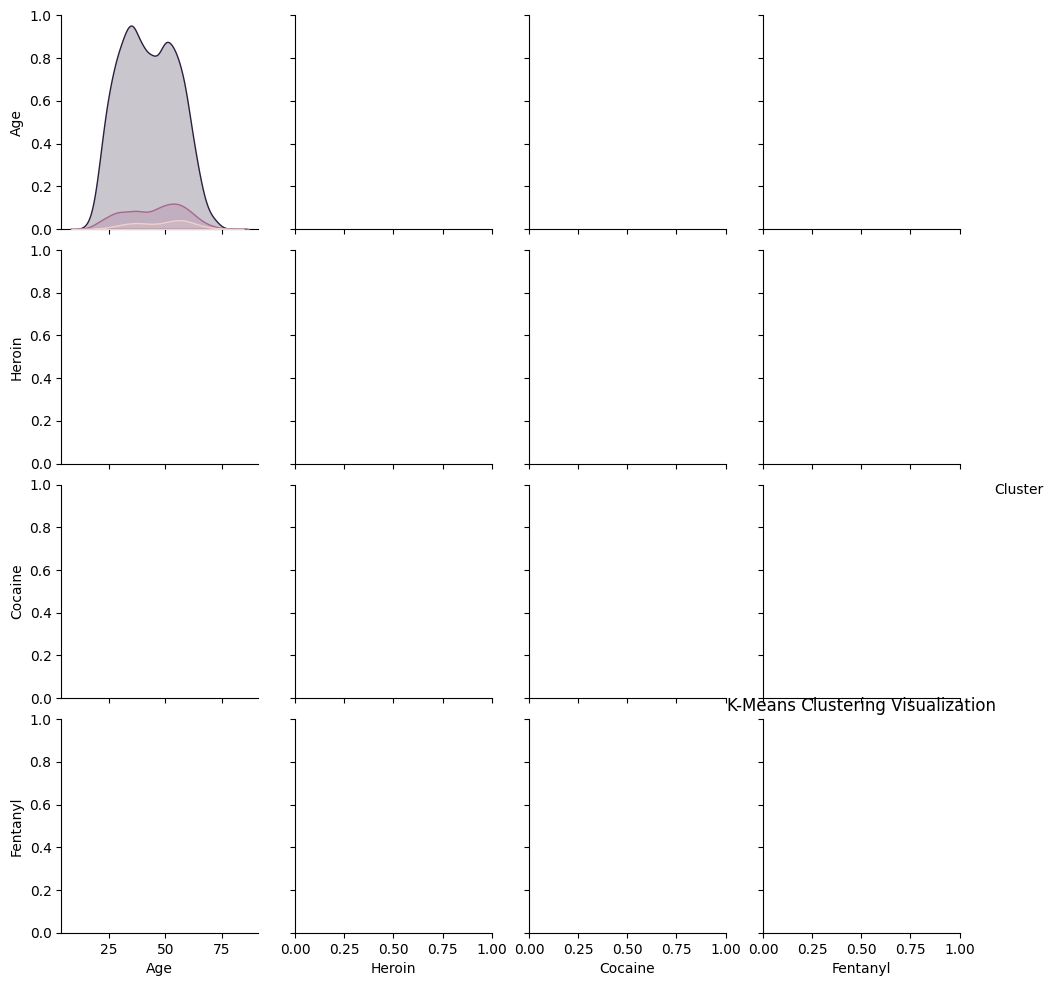

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant demographic and substance columns
clustering_data = df_cleaned[['Age', 'Sex', 'Race', 'Heroin', 'Cocaine', 'Fentanyl']]

# Convert 'Sex' and 'Race' to one-hot encoding (get_dummies) for categorical variables
clustering_data = pd.get_dummies(clustering_data, columns=['Sex', 'Race'], drop_first=True)

# Handle non-binary values in the 'Fentanyl' column (if applicable)
clustering_data['Fentanyl'] = df_cleaned['Fentanyl'].replace({'Y': 1, 'N': 0, 'Y POPS': 1, 'Y (PTCH)': 1})

# Convert 'Y' to 1 and 'N' to 0 for substance columns
clustering_data['Heroin'] = df_cleaned['Heroin'].replace({'Y': 1, 'N': 0})
clustering_data['Cocaine'] = df_cleaned['Cocaine'].replace({'Y': 1, 'N': 0})

# Ensure that all relevant columns are numeric for plotting
clustering_data['Heroin'] = pd.to_numeric(clustering_data['Heroin'], errors='coerce')
clustering_data['Cocaine'] = pd.to_numeric(clustering_data['Cocaine'], errors='coerce')
clustering_data['Fentanyl'] = pd.to_numeric(clustering_data['Fentanyl'], errors='coerce')

# Check if the data is fully numeric
print(clustering_data.dtypes)

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Apply K-means clustering (with n_init specified to suppress the warning)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Add the cluster assignments back to the DataFrame
df_cleaned['Cluster'] = clusters

# Ensure 'Heroin', 'Cocaine', 'Fentanyl', and 'Age' are numeric in df_cleaned for plotting
df_cleaned['Heroin'] = pd.to_numeric(df_cleaned['Heroin'], errors='coerce')
df_cleaned['Cocaine'] = pd.to_numeric(df_cleaned['Cocaine'], errors='coerce')
df_cleaned['Fentanyl'] = pd.to_numeric(df_cleaned['Fentanyl'], errors='coerce')
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')

# Visualize the clustering using a pair plot
sns.pairplot(df_cleaned, hue='Cluster', vars=['Age', 'Heroin', 'Cocaine', 'Fentanyl'])
plt.title("K-Means Clustering Visualization")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Heroin' 'Cocaine' 'Fentanyl']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


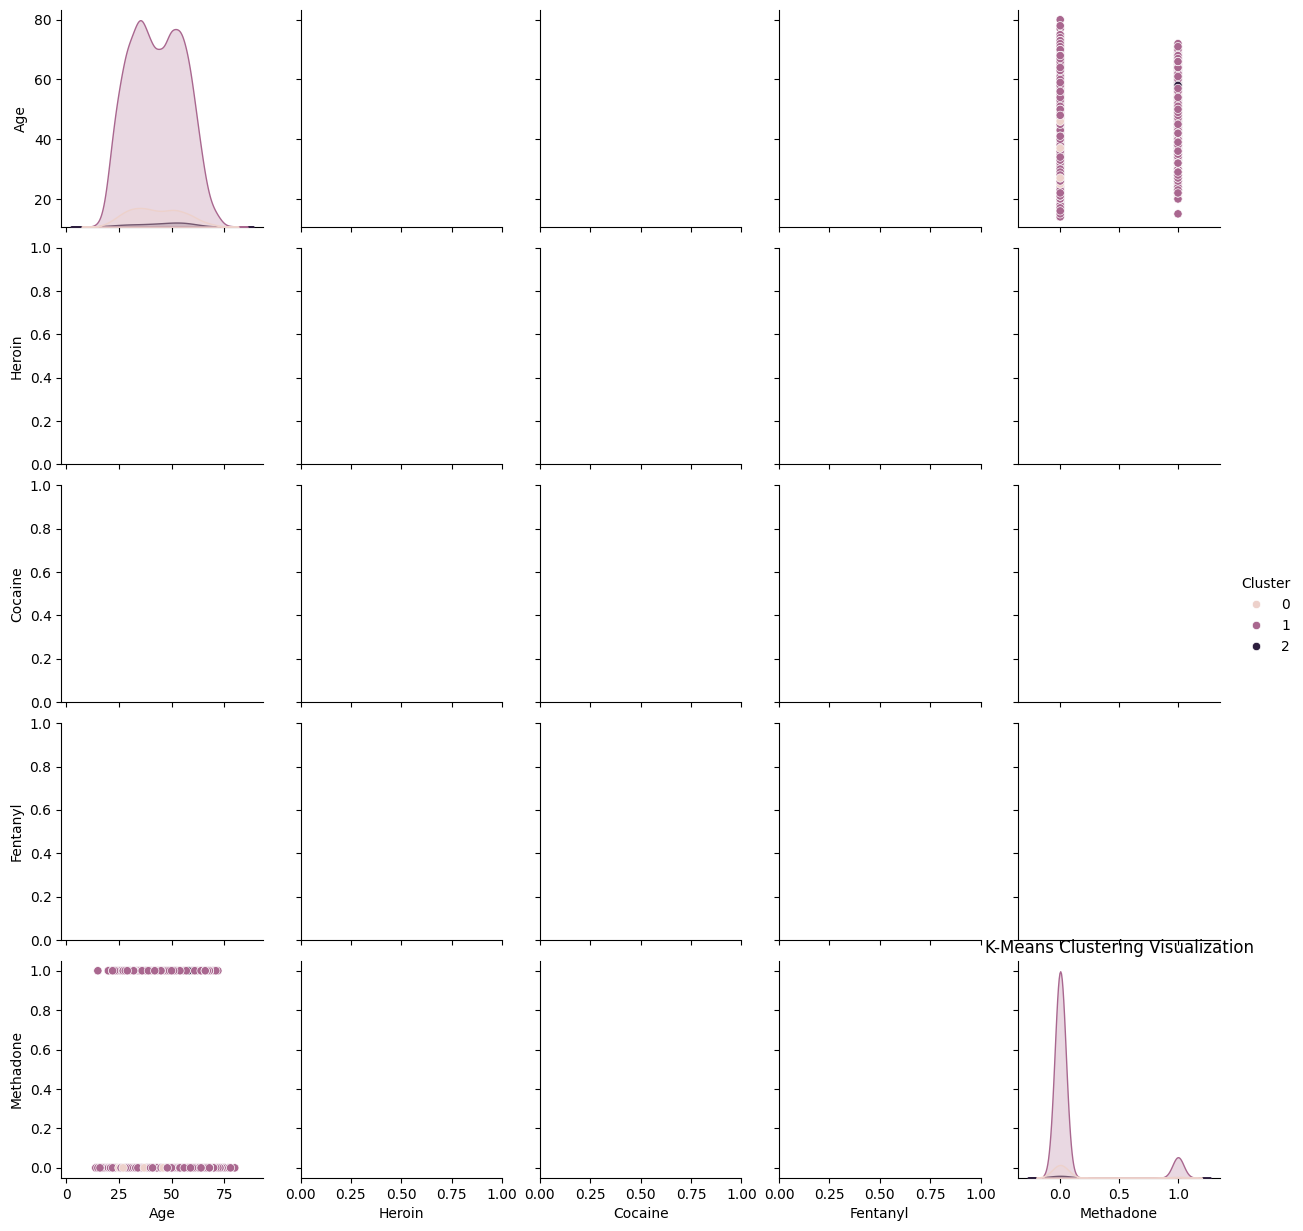

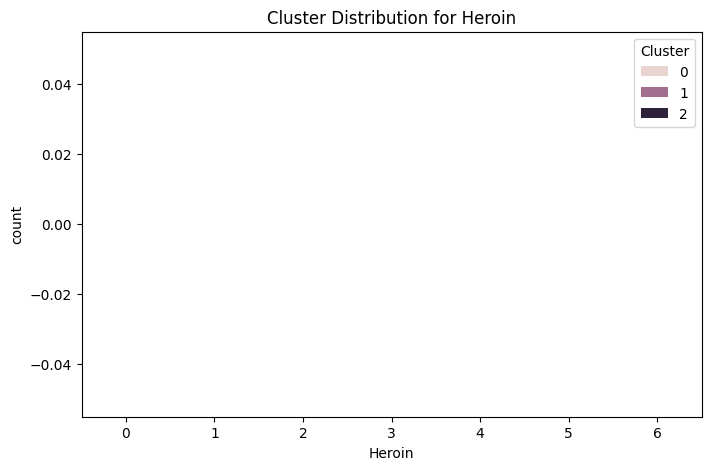

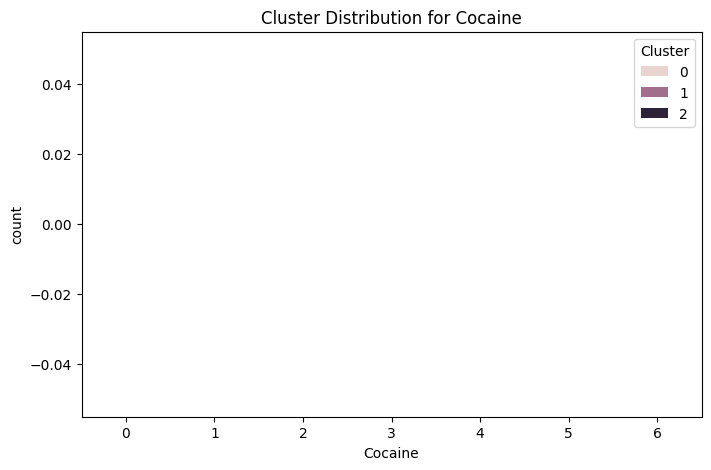

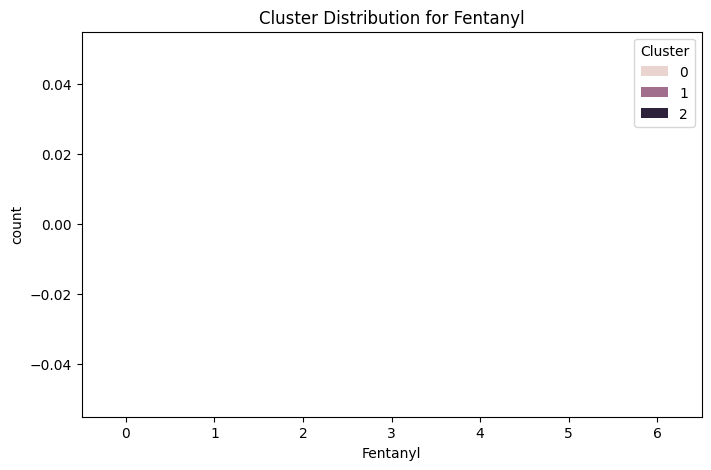

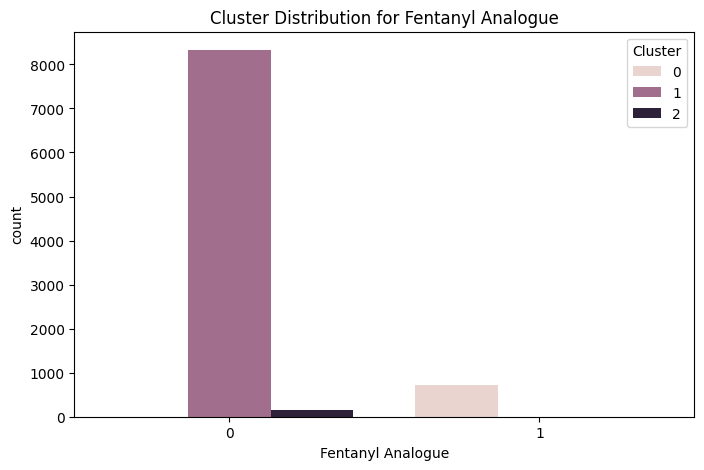

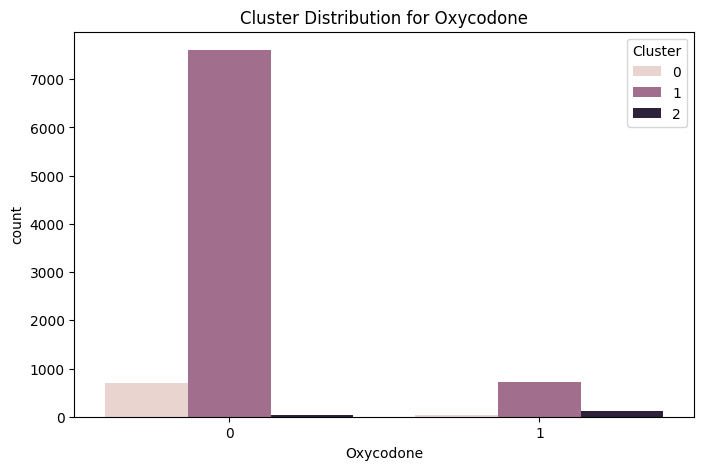

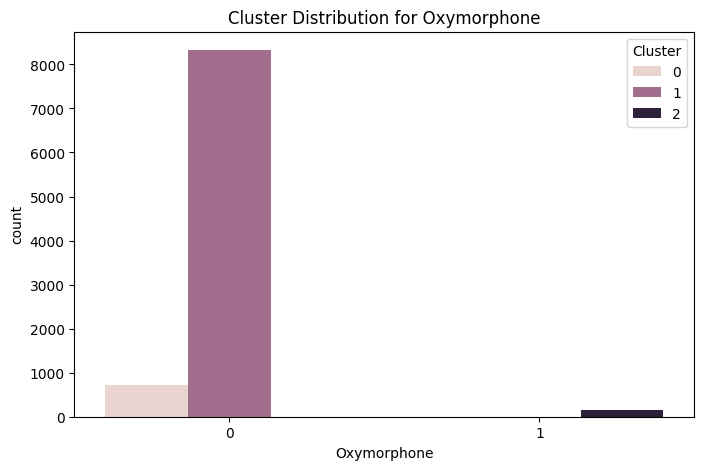

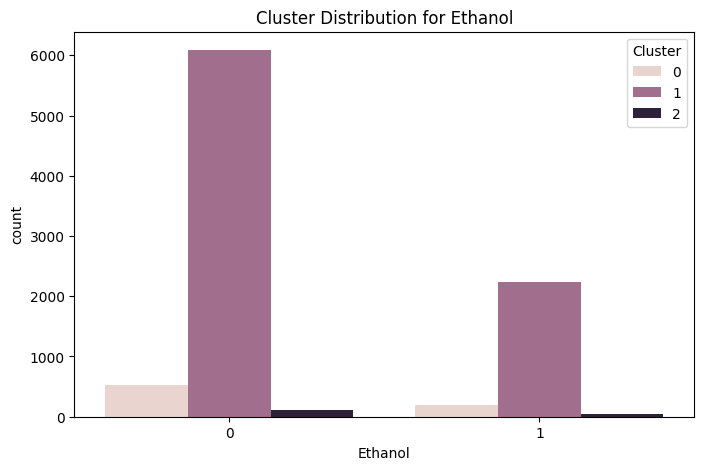

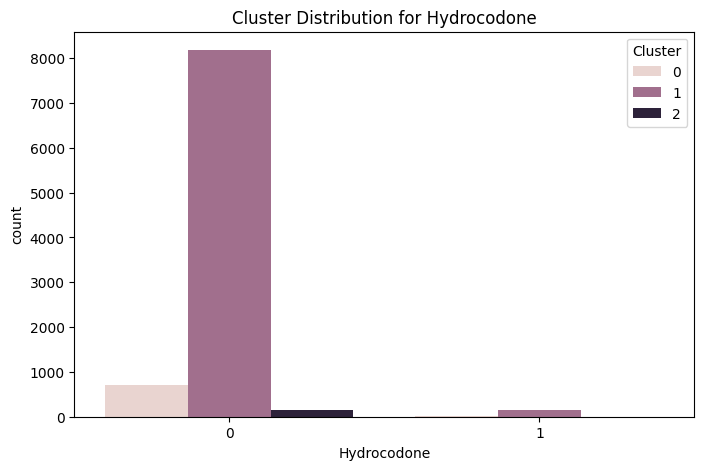

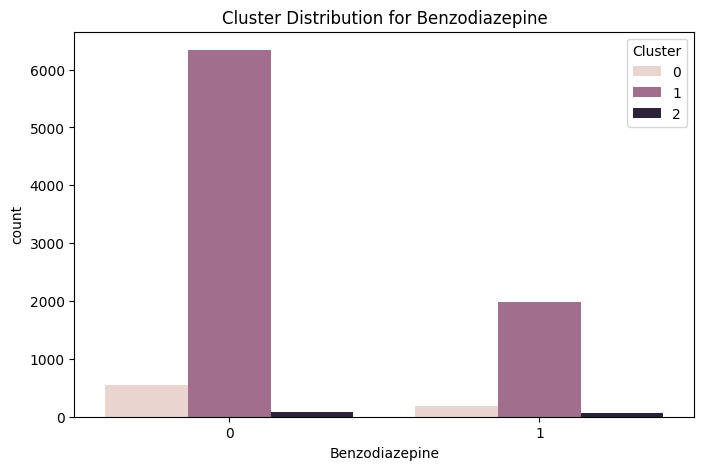

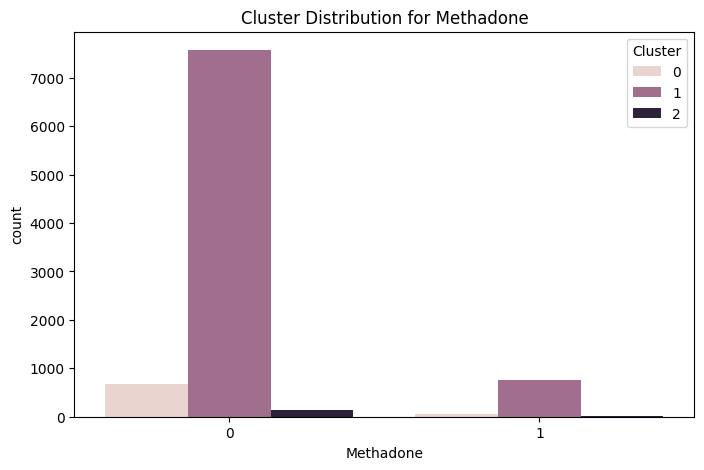

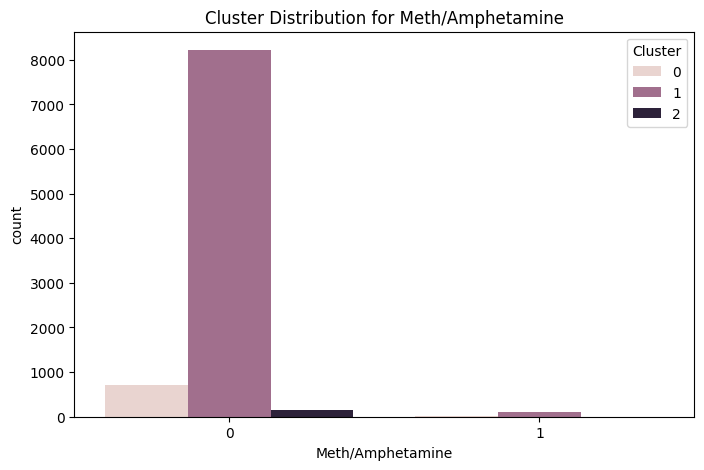

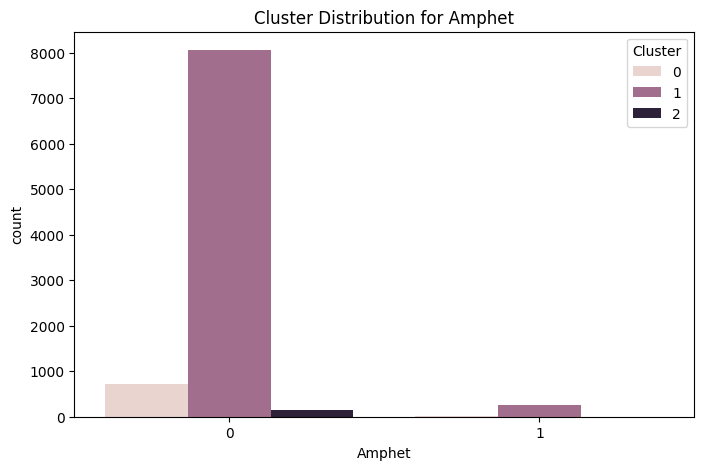

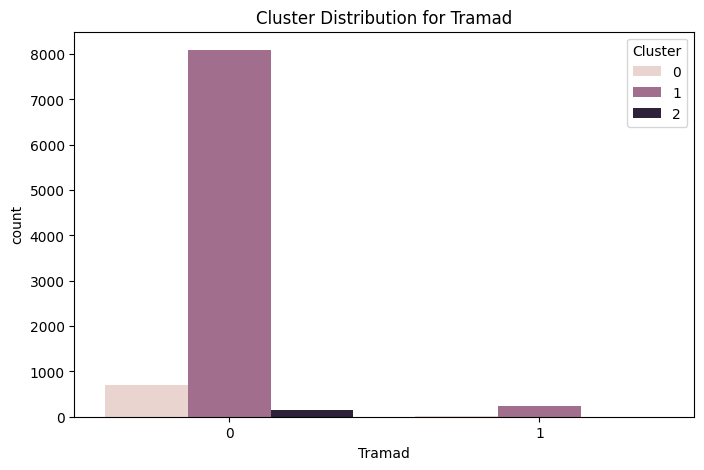

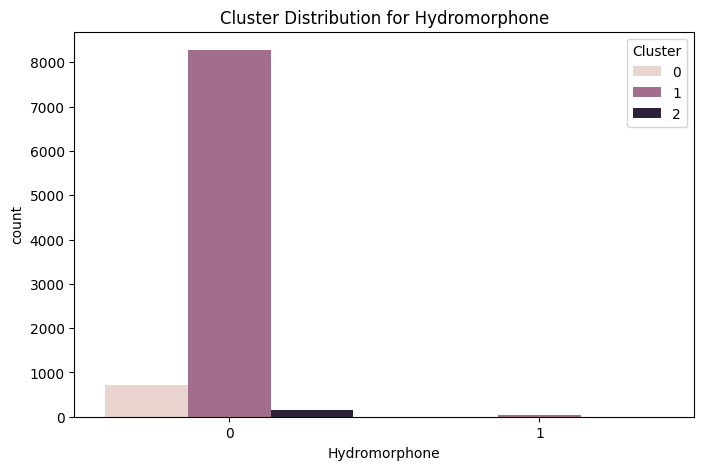

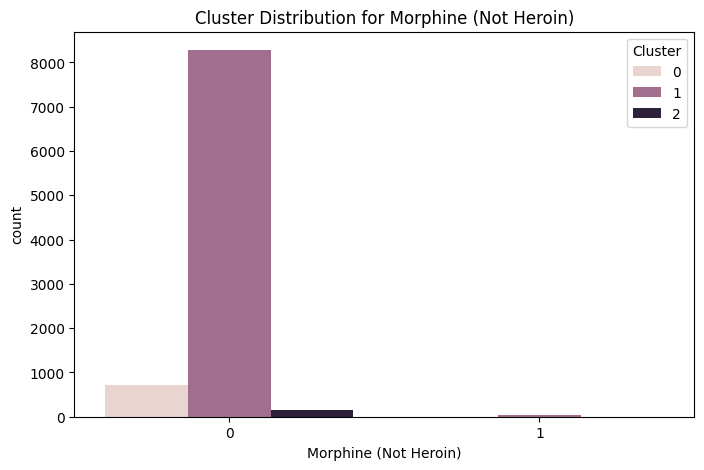

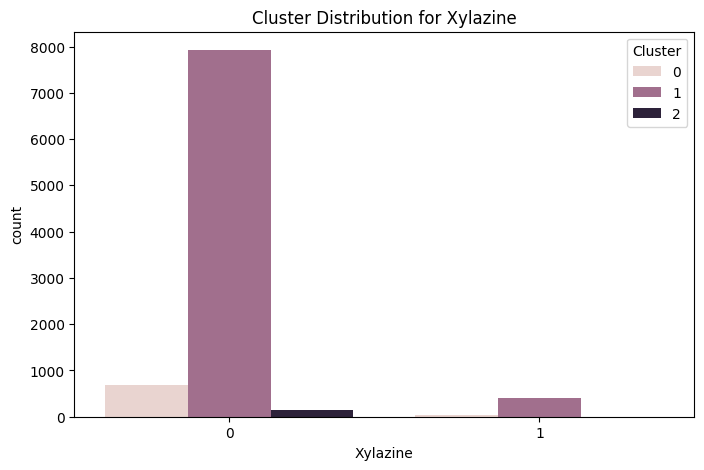

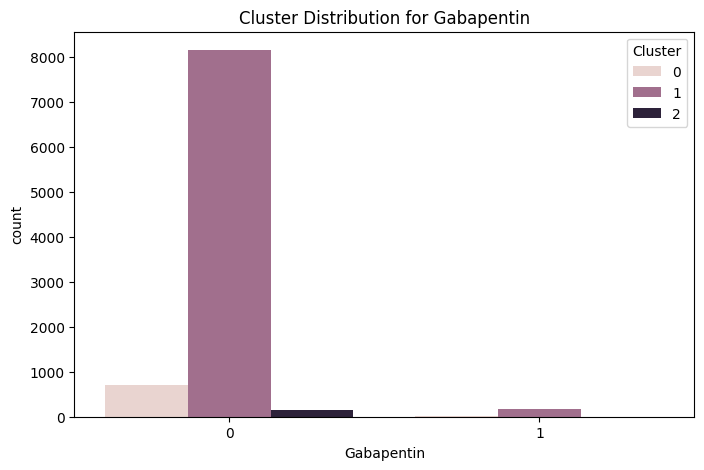

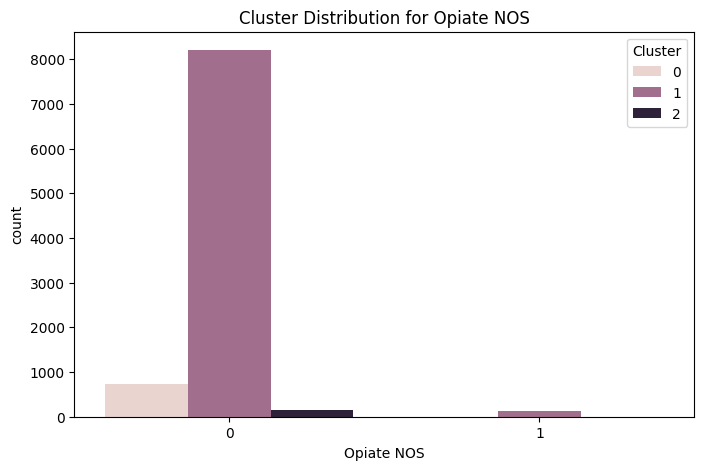

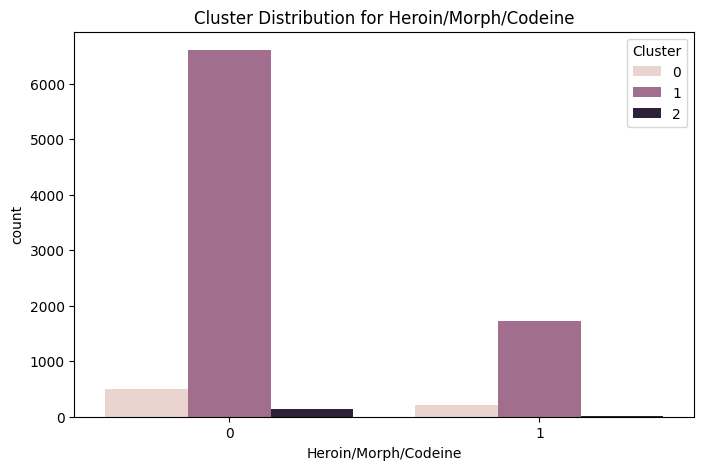

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# List of selected substance columns with 'Y'/'N' values
substance_columns = [
    'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone',
    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
    'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
    'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine'
]

# Step 1: Convert 'Y' to 1 and 'N' to 0 for all substance columns
for col in substance_columns:
    df_cleaned[col] = df_cleaned[col].replace({'Y': 1, 'N': 0})

# Step 2: Select relevant columns for clustering (Age + all selected substance-related columns)
clustering_data = df_cleaned[['Age'] + substance_columns]

# Step 3: Impute missing values (if any) using mean imputation
imputer = SimpleImputer(strategy='mean')
clustering_data_imputed = imputer.fit_transform(clustering_data)

# Step 4: Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data_imputed)

# Step 5: Apply K-means clustering (with n_init specified to suppress the warning)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Step 6: Add the cluster assignments back to the DataFrame
df_cleaned['Cluster'] = clusters

# Step 7: Visualize the clustering using a pair plot (for a few key variables to avoid too much clutter)
sns.pairplot(df_cleaned, hue='Cluster', vars=['Age', 'Heroin', 'Cocaine', 'Fentanyl', 'Methadone'])
plt.title('K-Means Clustering Visualization')
plt.show()

# Step 8: Explore the distribution of clusters for each substance (optional)
for col in substance_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Cluster', data=df_cleaned)
    plt.title(f'Cluster Distribution for {col}')
    plt.show()


# 1.	Temporal and Demographic Analysis:

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           9202 non-null   object 
 1   Date Type                      9202 non-null   object 
 2   Age                            9202 non-null   float64
 3   Sex                            9202 non-null   object 
 4   Race                           9202 non-null   object 
 5   Ethnicity                      9202 non-null   object 
 6   Residence City                 9202 non-null   object 
 7   Residence County               9202 non-null   object 
 8   Residence State                9202 non-null   object 
 9   Injury City                    9202 non-null   object 
 10  Injury County                  9202 non-null   object 
 11  Injury State                   9202 non-null   object 
 12  Injury Place                   9202 non-null   o

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np

# Set display options for better visibility
pd.set_option('display.max_columns', None)

In [170]:
# Filter the dataset for years between 2012 and 2018
df_cleaned['Year'] = pd.DatetimeIndex(df_cleaned['Date']).year
df_filtered = df_cleaned[(df_cleaned['Year'] >= 2012) & (df_cleaned['Year'] <= 2018)]

# Ensure demographic columns are cleaned and properly formatted
df_filtered = df_filtered[['Year', 'Age', 'Sex', 'Race']]

Mean Squared Error (MSE): 2971.3333333333635


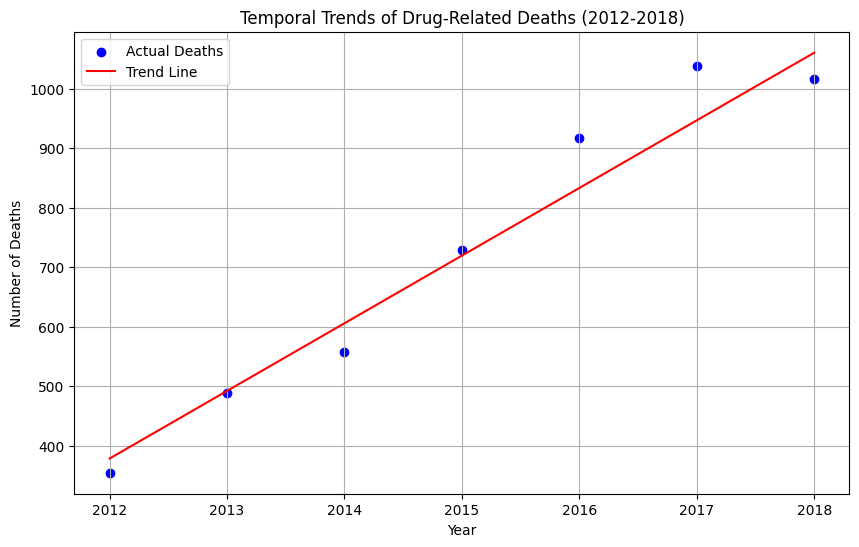

In [171]:
# Group by year and count deaths per year
deaths_per_year = df_filtered.groupby('Year').size().reset_index(name='Death_Count')

# Set up Linear Regression model to understand the temporal trend
X = deaths_per_year['Year'].values.reshape(-1, 1)  # Independent variable: Year
y = deaths_per_year['Death_Count']  # Dependent variable: Death count

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict values for test set
y_pred = linear_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Plot the trend line
plt.figure(figsize=(10, 6))
plt.scatter(deaths_per_year['Year'], deaths_per_year['Death_Count'], color='blue', label='Actual Deaths')
plt.plot(deaths_per_year['Year'], linear_reg.predict(deaths_per_year['Year'].values.reshape(-1, 1)), color='red', label='Trend Line')
plt.title('Temporal Trends of Drug-Related Deaths (2012-2018)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.show()

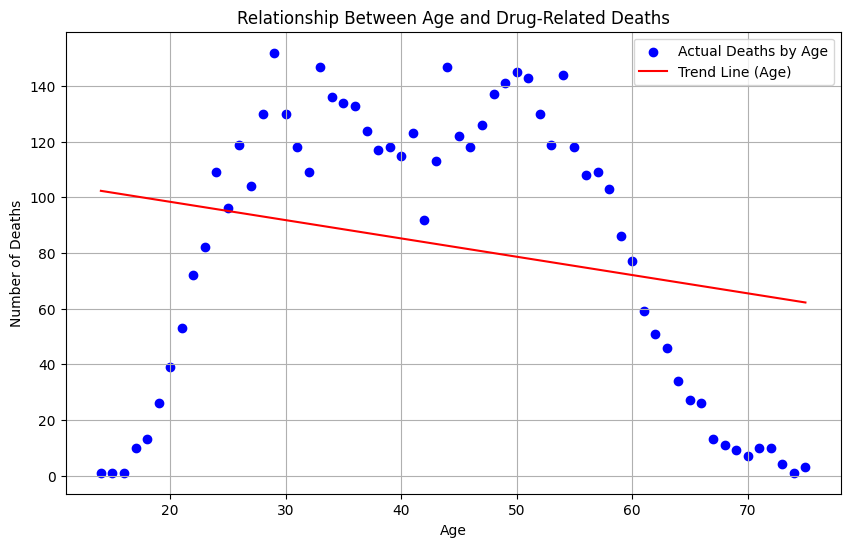

In [172]:
# Group by age and count deaths
age_death_count = df_filtered.groupby('Age').size().reset_index(name='Death_Count')

# Fit linear regression model to Age vs Death_Count
X_age = age_death_count['Age'].values.reshape(-1, 1)
y_age = age_death_count['Death_Count']

# Train the Linear Regression model
linear_reg_age = LinearRegression()
linear_reg_age.fit(X_age, y_age)

# Predict values for age
y_pred_age = linear_reg_age.predict(X_age)

# Plot the relationship between Age and Death Count
plt.figure(figsize=(10, 6))
plt.scatter(age_death_count['Age'], age_death_count['Death_Count'], color='blue', label='Actual Deaths by Age')
plt.plot(age_death_count['Age'], y_pred_age, color='red', label='Trend Line (Age)')
plt.title('Relationship Between Age and Drug-Related Deaths')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.show()

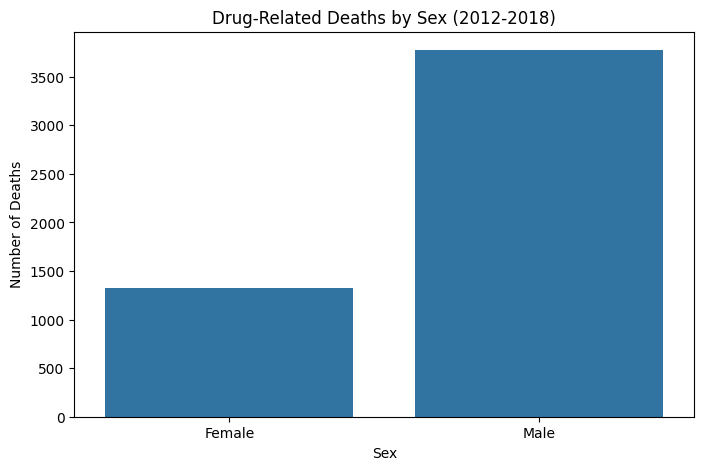

In [173]:
# Group by Sex and count deaths
sex_death_count = df_filtered.groupby('Sex').size().reset_index(name='Death_Count')

# Plot the bar chart for Deaths by Sex
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Death_Count', data=sex_death_count)
plt.title('Drug-Related Deaths by Sex (2012-2018)')
plt.ylabel('Number of Deaths')
plt.xlabel('Sex')
plt.show()

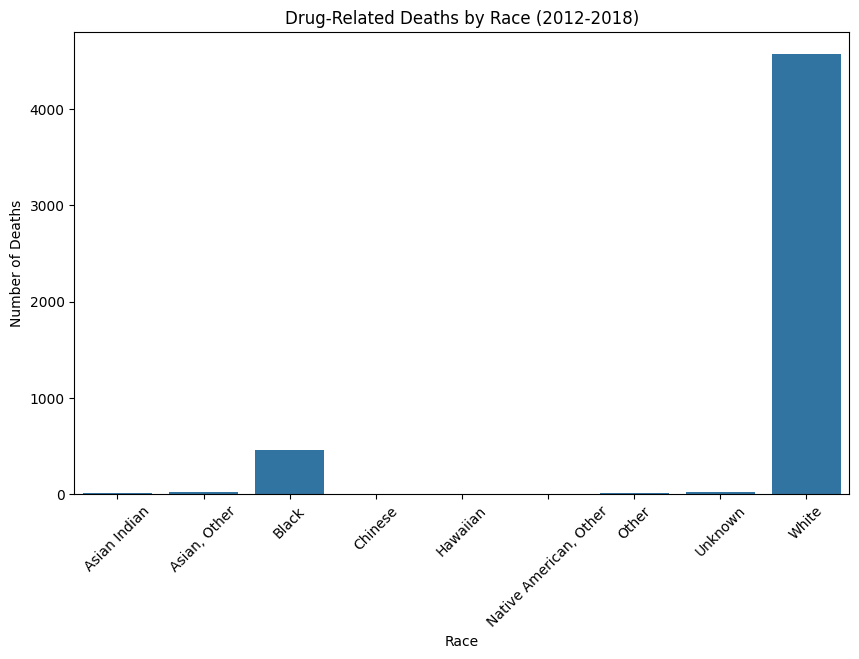

In [174]:
# Group by Race and count deaths
race_death_count = df_filtered.groupby('Race').size().reset_index(name='Death_Count')

# Plot the bar chart for Deaths by Race
plt.figure(figsize=(10, 6))
sns.barplot(x='Race', y='Death_Count', data=race_death_count)
plt.title('Drug-Related Deaths by Race (2012-2018)')
plt.ylabel('Number of Deaths')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.show()

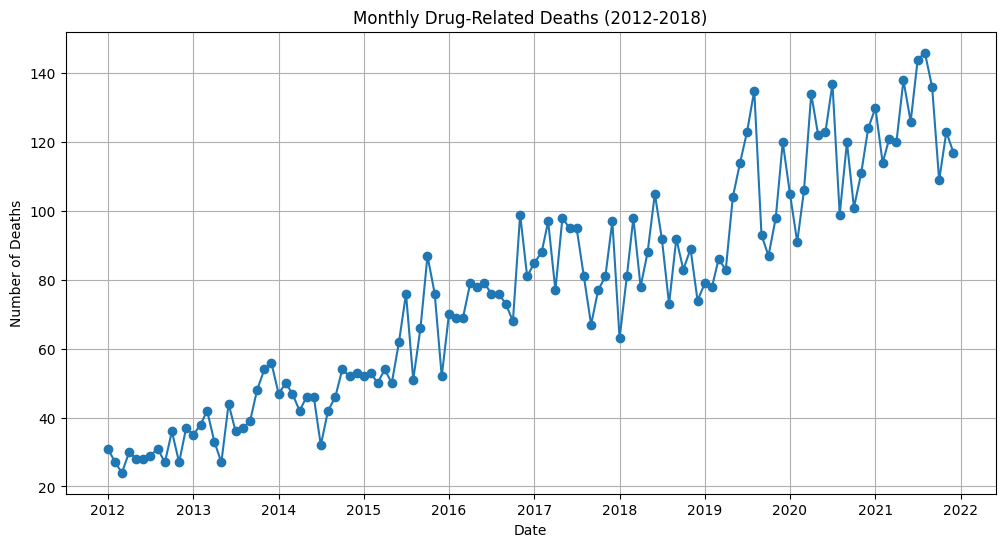

In [175]:
# Extract month and year from Date for time-series analysis
df_cleaned['Month'] = pd.DatetimeIndex(df_cleaned['Date']).month
df_time_series = df_cleaned.groupby(['Year', 'Month']).size().reset_index(name='Death_Count')

# Convert to a proper datetime format
df_time_series['Date'] = pd.to_datetime(df_time_series[['Year', 'Month']].assign(Day=1))

# Plot the time series of deaths over time (monthly)
plt.figure(figsize=(12, 6))
plt.plot(df_time_series['Date'], df_time_series['Death_Count'], marker='o')
plt.title('Monthly Drug-Related Deaths (2012-2018)')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

## Geospatial Analysis

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [177]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9198 entries, 0 to 9201
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           9198 non-null   datetime64[ns]
 1   Age                            9198 non-null   float64       
 2   Sex                            9198 non-null   object        
 3   Race                           9198 non-null   object        
 4   Ethnicity                      9198 non-null   object        
 5   Residence State                9198 non-null   object        
 6   Other Significant Conditions   813 non-null    object        
 7   Heroin                         0 non-null      float64       
 8   Cocaine                        0 non-null      float64       
 9   Fentanyl                       0 non-null      float64       
 10  Fentanyl Analogue              9198 non-null   int64         
 11  Oxycodone             

In [178]:
# List of substance-related columns with 'Y'/'N' values
substance_columns = [
    'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone',
    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
    'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
    'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'Other Opioid'
]

# Convert 'Y' to 1 and 'N' to 0 for all substance columns
for col in substance_columns:
    df_cleaned[col] = df_cleaned[col].replace({'Y': 1, 'N': 0})

# Convert 'Sex' and 'Race' to one-hot encoding (numerical format)
df_cleaned = pd.get_dummies(df_cleaned, columns=['Sex', 'Race'], drop_first=True)

# Define features (demographic + some substances) and target (predicting substance involvement)
X = df_cleaned[['Age', 'Sex_Male', 'Race_White']]  # Features
y = df_cleaned[substance_columns]  # Target variables: Multi-label classification for substances

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Substance: Heroin
Confusion Matrix for Heroin:
[[2760]]
Classification Report for Heroin (Decision Tree):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2760

    accuracy                           1.00      2760
   macro avg       1.00      1.00      1.00      2760
weighted avg       1.00      1.00      1.00      2760

ROC-AUC is not defined for Heroin because only one class is present in y_test.
Substance: Cocaine
Confusion Matrix for Cocaine:
[[2760]]
Classification Report for Cocaine (Decision Tree):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2760

    accuracy                           1.00      2760
   macro avg       1.00      1.00      1.00      2760
weighted avg       1.00      1.00      1.00      2760

ROC-AUC is not defined for Cocaine because only one class is present in y_test.
Substance: Fentanyl
Confusion Matrix for Fentanyl:
[[2760]]
Classification Repor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


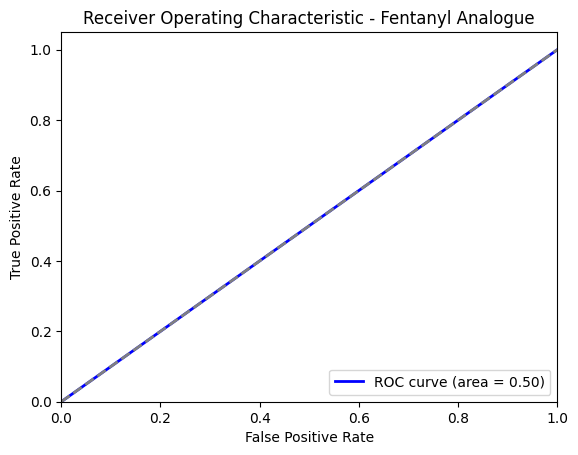

Substance: Oxycodone
Confusion Matrix for Oxycodone:
[[2491    3]
 [ 265    1]]
Classification Report for Oxycodone (Decision Tree):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2494
           1       0.25      0.00      0.01       266

    accuracy                           0.90      2760
   macro avg       0.58      0.50      0.48      2760
weighted avg       0.84      0.90      0.86      2760

ROC-AUC Score for Oxycodone: 0.5013


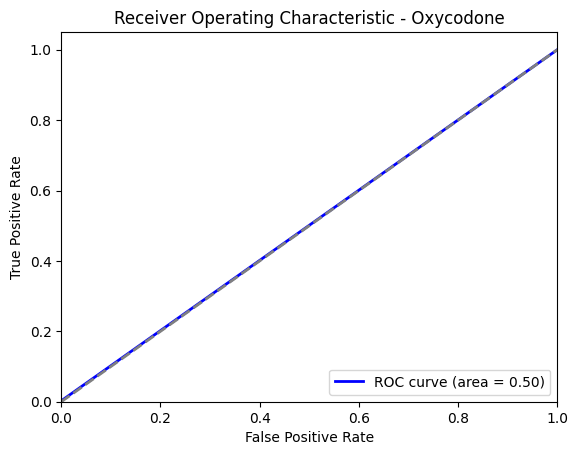

Substance: Oxymorphone
Confusion Matrix for Oxymorphone:
[[2722    0]
 [  38    0]]
Classification Report for Oxymorphone (Decision Tree):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2722
           1       0.00      0.00      0.00        38

    accuracy                           0.99      2760
   macro avg       0.49      0.50      0.50      2760
weighted avg       0.97      0.99      0.98      2760

ROC-AUC Score for Oxymorphone: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


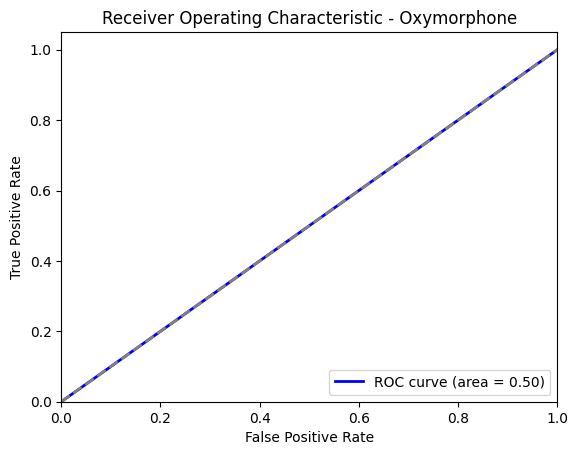

Substance: Ethanol
Confusion Matrix for Ethanol:
[[2005    7]
 [ 747    1]]
Classification Report for Ethanol (Decision Tree):
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      2012
           1       0.12      0.00      0.00       748

    accuracy                           0.73      2760
   macro avg       0.43      0.50      0.42      2760
weighted avg       0.56      0.73      0.61      2760

ROC-AUC Score for Ethanol: 0.4989


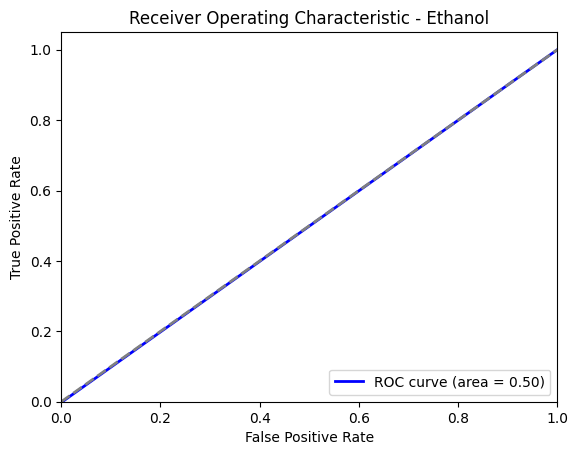

Substance: Hydrocodone
Confusion Matrix for Hydrocodone:
[[2716    0]
 [  44    0]]
Classification Report for Hydrocodone (Decision Tree):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2716
           1       0.00      0.00      0.00        44

    accuracy                           0.98      2760
   macro avg       0.49      0.50      0.50      2760
weighted avg       0.97      0.98      0.98      2760

ROC-AUC Score for Hydrocodone: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


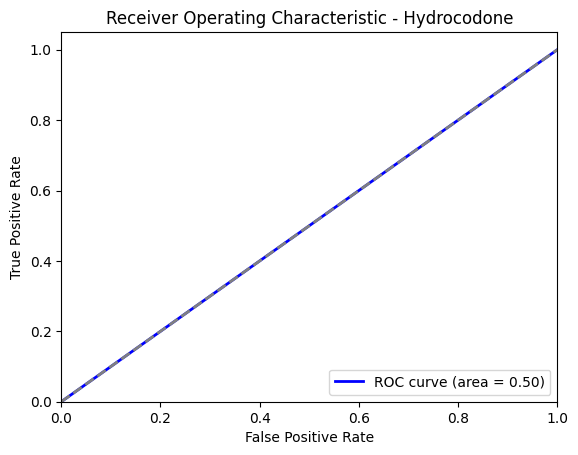

Substance: Benzodiazepine
Confusion Matrix for Benzodiazepine:
[[2065   28]
 [ 641   26]]
Classification Report for Benzodiazepine (Decision Tree):
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      2093
           1       0.48      0.04      0.07       667

    accuracy                           0.76      2760
   macro avg       0.62      0.51      0.47      2760
weighted avg       0.70      0.76      0.67      2760

ROC-AUC Score for Benzodiazepine: 0.5128


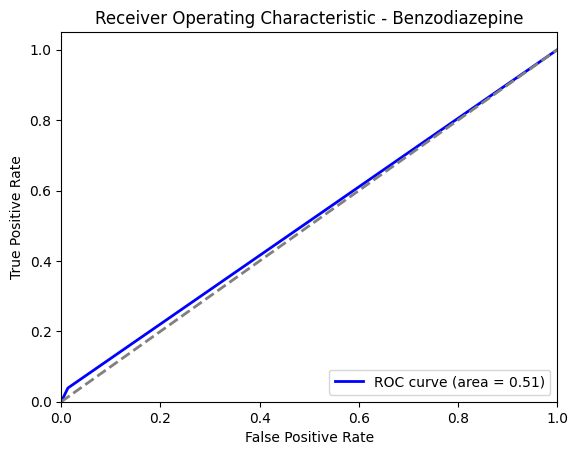

Substance: Methadone
Confusion Matrix for Methadone:
[[2541    2]
 [ 217    0]]
Classification Report for Methadone (Decision Tree):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2543
           1       0.00      0.00      0.00       217

    accuracy                           0.92      2760
   macro avg       0.46      0.50      0.48      2760
weighted avg       0.85      0.92      0.88      2760

ROC-AUC Score for Methadone: 0.4996


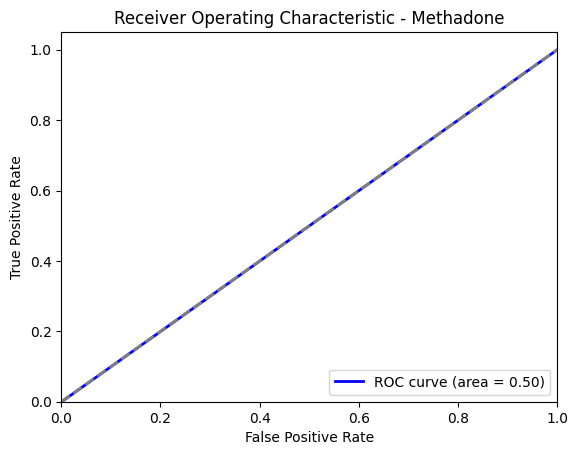

Substance: Meth/Amphetamine
Confusion Matrix for Meth/Amphetamine:
[[2713    0]
 [  47    0]]
Classification Report for Meth/Amphetamine (Decision Tree):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2713
           1       0.00      0.00      0.00        47

    accuracy                           0.98      2760
   macro avg       0.49      0.50      0.50      2760
weighted avg       0.97      0.98      0.97      2760

ROC-AUC Score for Meth/Amphetamine: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


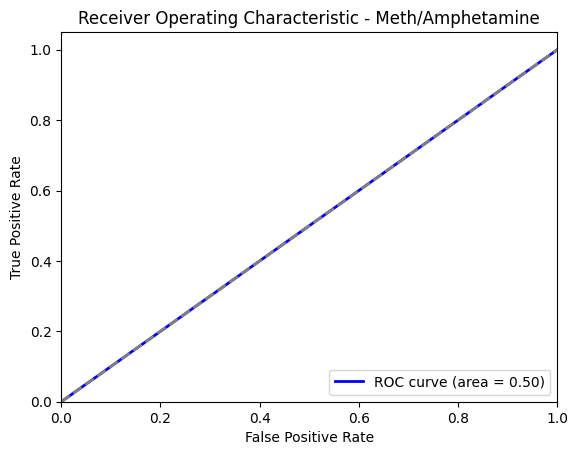

Substance: Amphet
Confusion Matrix for Amphet:
[[2676    4]
 [  80    0]]
Classification Report for Amphet (Decision Tree):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2680
           1       0.00      0.00      0.00        80

    accuracy                           0.97      2760
   macro avg       0.49      0.50      0.49      2760
weighted avg       0.94      0.97      0.96      2760

ROC-AUC Score for Amphet: 0.4993


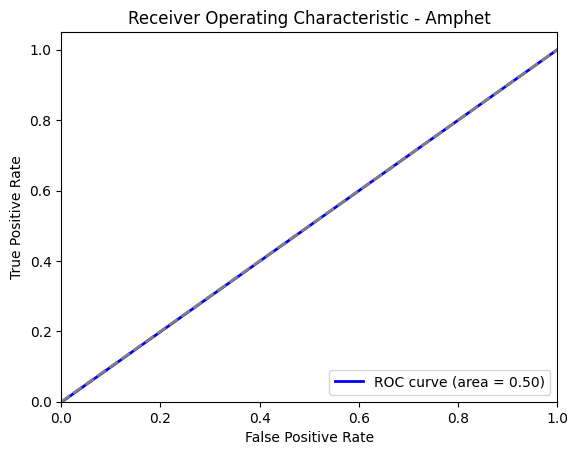

Substance: Tramad
Confusion Matrix for Tramad:
[[2695    0]
 [  65    0]]
Classification Report for Tramad (Decision Tree):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2695
           1       0.00      0.00      0.00        65

    accuracy                           0.98      2760
   macro avg       0.49      0.50      0.49      2760
weighted avg       0.95      0.98      0.96      2760

ROC-AUC Score for Tramad: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


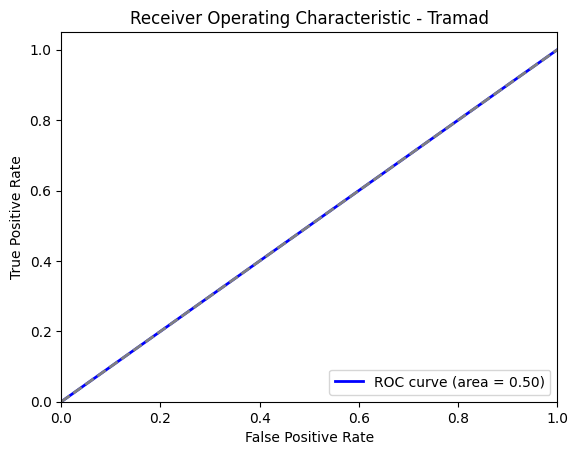

Substance: Hydromorphone
Confusion Matrix for Hydromorphone:
[[2740    0]
 [  20    0]]
Classification Report for Hydromorphone (Decision Tree):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2740
           1       0.00      0.00      0.00        20

    accuracy                           0.99      2760
   macro avg       0.50      0.50      0.50      2760
weighted avg       0.99      0.99      0.99      2760

ROC-AUC Score for Hydromorphone: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


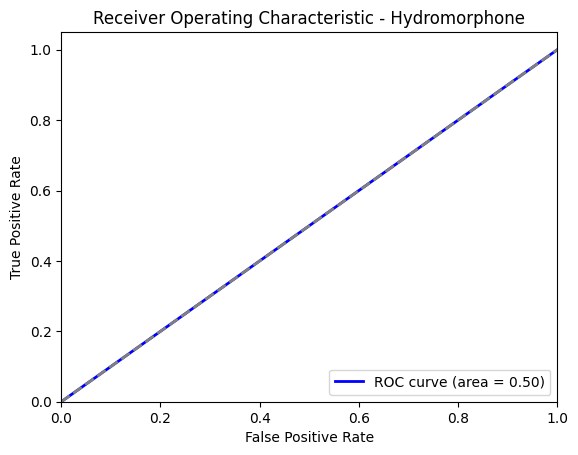

Substance: Morphine (Not Heroin)
Confusion Matrix for Morphine (Not Heroin):
[[2747    0]
 [  13    0]]
Classification Report for Morphine (Not Heroin) (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2747
           1       0.00      0.00      0.00        13

    accuracy                           1.00      2760
   macro avg       0.50      0.50      0.50      2760
weighted avg       0.99      1.00      0.99      2760

ROC-AUC Score for Morphine (Not Heroin): 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


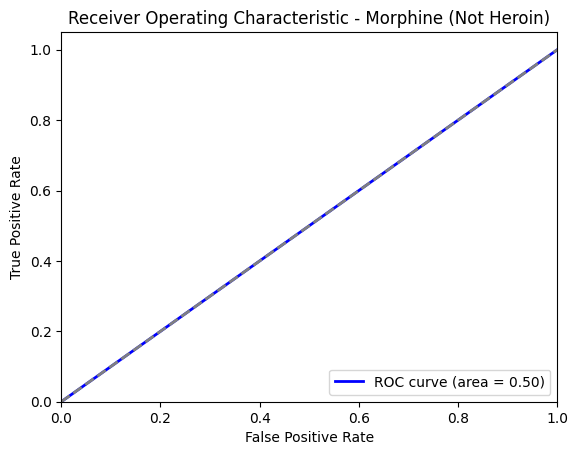

Substance: Xylazine
Confusion Matrix for Xylazine:
[[2629    1]
 [ 130    0]]
Classification Report for Xylazine (Decision Tree):
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2630
           1       0.00      0.00      0.00       130

    accuracy                           0.95      2760
   macro avg       0.48      0.50      0.49      2760
weighted avg       0.91      0.95      0.93      2760

ROC-AUC Score for Xylazine: 0.4998


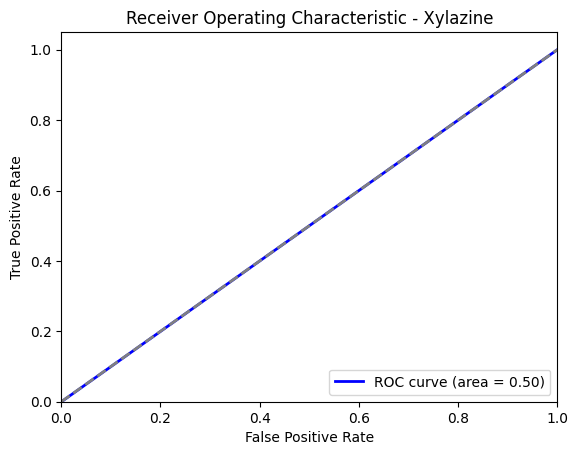

Substance: Gabapentin
Confusion Matrix for Gabapentin:
[[2708    2]
 [  50    0]]
Classification Report for Gabapentin (Decision Tree):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2710
           1       0.00      0.00      0.00        50

    accuracy                           0.98      2760
   macro avg       0.49      0.50      0.50      2760
weighted avg       0.96      0.98      0.97      2760

ROC-AUC Score for Gabapentin: 0.4996


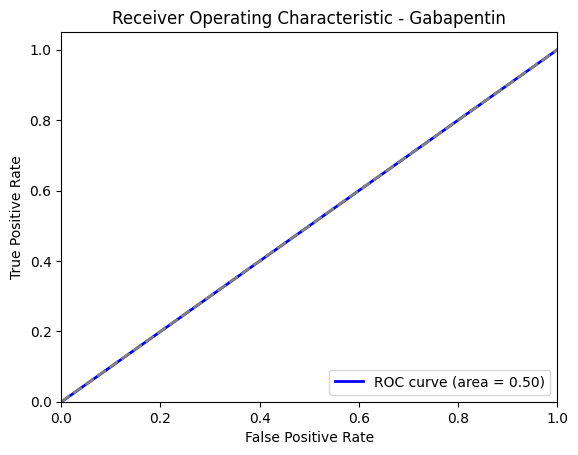

Substance: Opiate NOS
Confusion Matrix for Opiate NOS:
[[2720    0]
 [  40    0]]
Classification Report for Opiate NOS (Decision Tree):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2720
           1       0.00      0.00      0.00        40

    accuracy                           0.99      2760
   macro avg       0.49      0.50      0.50      2760
weighted avg       0.97      0.99      0.98      2760

ROC-AUC Score for Opiate NOS: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


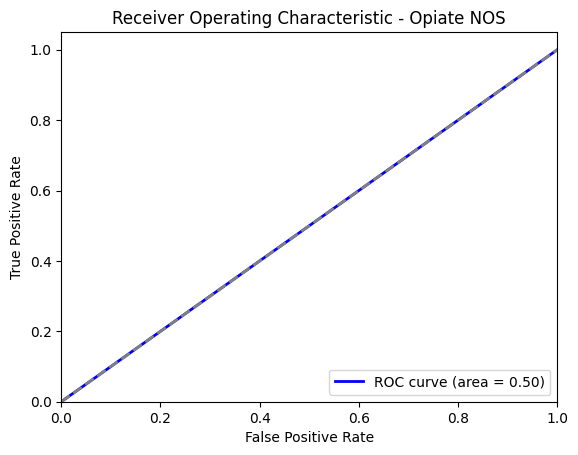

Substance: Heroin/Morph/Codeine
Confusion Matrix for Heroin/Morph/Codeine:
[[2168   12]
 [ 578    2]]
Classification Report for Heroin/Morph/Codeine (Decision Tree):
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      2180
           1       0.14      0.00      0.01       580

    accuracy                           0.79      2760
   macro avg       0.47      0.50      0.44      2760
weighted avg       0.65      0.79      0.70      2760

ROC-AUC Score for Heroin/Morph/Codeine: 0.4990


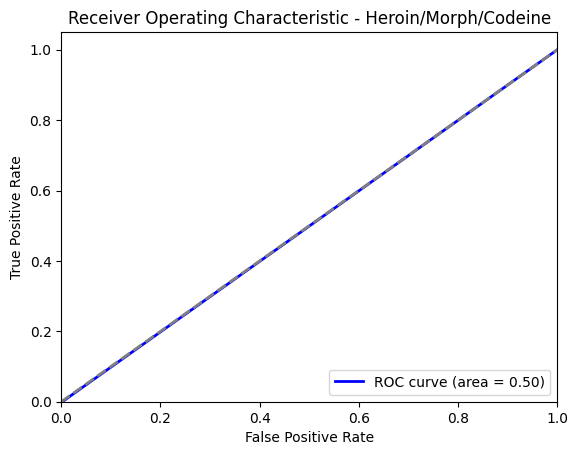

Substance: Other Opioid
Confusion Matrix for Other Opioid:
[[2734    3]
 [  23    0]]
Classification Report for Other Opioid (Decision Tree):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2737
           1       0.00      0.00      0.00        23

    accuracy                           0.99      2760
   macro avg       0.50      0.50      0.50      2760
weighted avg       0.98      0.99      0.99      2760

ROC-AUC Score for Other Opioid: 0.4995


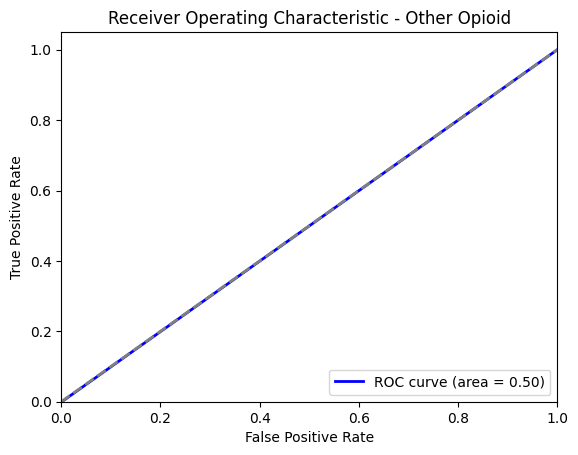

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Handle missing values in the target variables (fill NaN with 0, assuming no substance involvement)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

# Ensure the target variables are numeric
y_train = y_train.apply(pd.to_numeric)
y_test = y_test.apply(pd.to_numeric)

# Train a Decision Tree model for each substance
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_tree = decision_tree_model.predict(X_test_scaled)

# Evaluate Decision Tree for each substance
for i, col in enumerate(substance_columns):
    print(f"Substance: {col}")

    # Confusion Matrix
    cm = confusion_matrix(y_test[col], y_pred_tree[:, i])
    print(f"Confusion Matrix for {col}:\n{cm}")

    # Classification Report
    print(f"Classification Report for {col} (Decision Tree):")
    print(classification_report(y_test[col], y_pred_tree[:, i]))

    # Check if there are at least two classes in the target data
    if len(set(y_test[col])) > 1:
        # ROC-AUC score
        auc = roc_auc_score(y_test[col], y_pred_tree[:, i])
        print(f"ROC-AUC Score for {col}: {auc:.4f}")

        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_test[col], y_pred_tree[:, i])
        plt.figure()
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {col}')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f"ROC-AUC is not defined for {col} because only one class is present in y_test.")



Substance: Heroin
Skipping Heroin because only one class is present in the training set.

Substance: Cocaine
Skipping Cocaine because only one class is present in the training set.

Substance: Fentanyl
Skipping Fentanyl because only one class is present in the training set.

Substance: Fentanyl Analogue
Confusion Matrix for Fentanyl Analogue:
[[2539    0]
 [ 221    0]]
Classification Report for Fentanyl Analogue (SVM):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2539
           1       0.00      0.00      0.00       221

    accuracy                           0.92      2760
   macro avg       0.46      0.50      0.48      2760
weighted avg       0.85      0.92      0.88      2760

ROC-AUC Score for Fentanyl Analogue: 0.4557


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


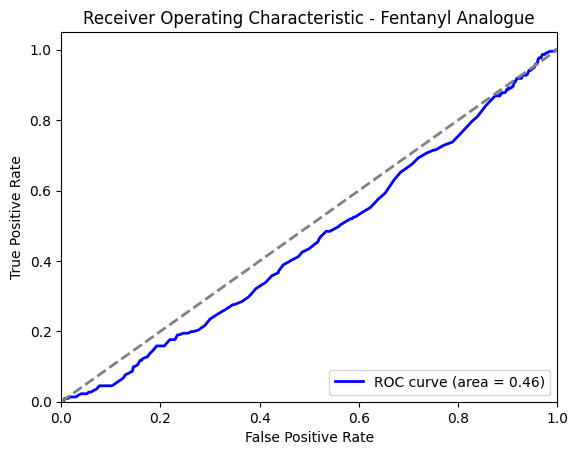


Substance: Oxycodone
Confusion Matrix for Oxycodone:
[[2494    0]
 [ 266    0]]
Classification Report for Oxycodone (SVM):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2494
           1       0.00      0.00      0.00       266

    accuracy                           0.90      2760
   macro avg       0.45      0.50      0.47      2760
weighted avg       0.82      0.90      0.86      2760



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC-AUC Score for Oxycodone: 0.4548


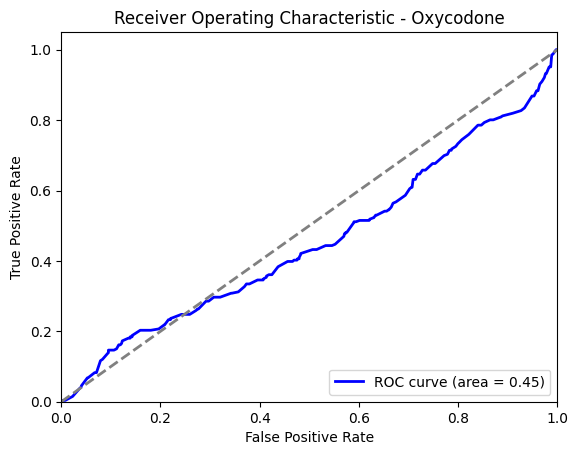


Substance: Oxymorphone
Confusion Matrix for Oxymorphone:
[[2722    0]
 [  38    0]]
Classification Report for Oxymorphone (SVM):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2722
           1       0.00      0.00      0.00        38

    accuracy                           0.99      2760
   macro avg       0.49      0.50      0.50      2760
weighted avg       0.97      0.99      0.98      2760

ROC-AUC Score for Oxymorphone: 0.4440


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


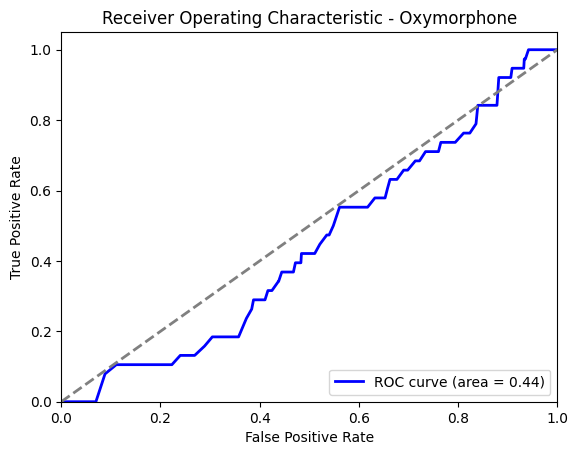


Substance: Ethanol
Confusion Matrix for Ethanol:
[[2012    0]
 [ 748    0]]
Classification Report for Ethanol (SVM):
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      2012
           1       0.00      0.00      0.00       748

    accuracy                           0.73      2760
   macro avg       0.36      0.50      0.42      2760
weighted avg       0.53      0.73      0.61      2760



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC-AUC Score for Ethanol: 0.4882


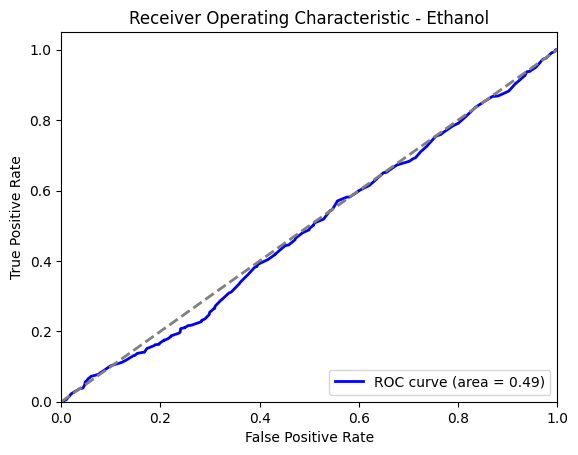


Substance: Hydrocodone
Confusion Matrix for Hydrocodone:
[[2716    0]
 [  44    0]]
Classification Report for Hydrocodone (SVM):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2716
           1       0.00      0.00      0.00        44

    accuracy                           0.98      2760
   macro avg       0.49      0.50      0.50      2760
weighted avg       0.97      0.98      0.98      2760

ROC-AUC Score for Hydrocodone: 0.4865


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


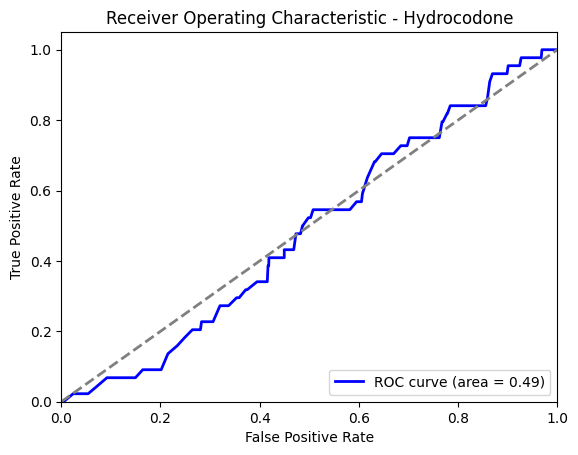


Substance: Benzodiazepine
Confusion Matrix for Benzodiazepine:
[[2093    0]
 [ 667    0]]
Classification Report for Benzodiazepine (SVM):
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2093
           1       0.00      0.00      0.00       667

    accuracy                           0.76      2760
   macro avg       0.38      0.50      0.43      2760
weighted avg       0.58      0.76      0.65      2760



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC-AUC Score for Benzodiazepine: 0.5294


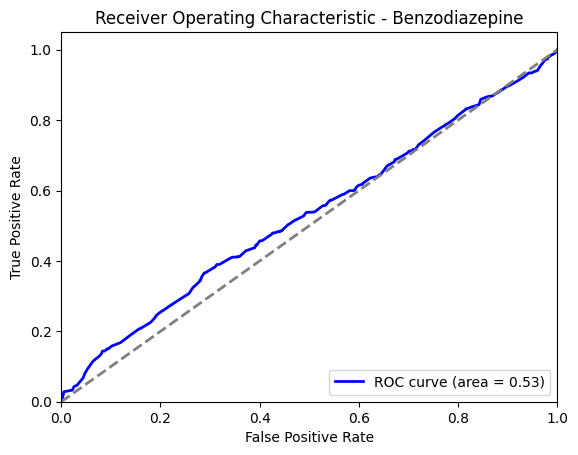


Substance: Methadone
Confusion Matrix for Methadone:
[[2543    0]
 [ 217    0]]
Classification Report for Methadone (SVM):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2543
           1       0.00      0.00      0.00       217

    accuracy                           0.92      2760
   macro avg       0.46      0.50      0.48      2760
weighted avg       0.85      0.92      0.88      2760



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC-AUC Score for Methadone: 0.5086


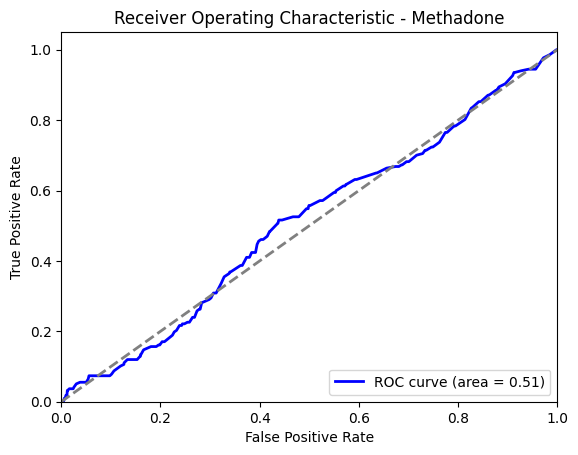


Substance: Meth/Amphetamine
Confusion Matrix for Meth/Amphetamine:
[[2713    0]
 [  47    0]]
Classification Report for Meth/Amphetamine (SVM):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2713
           1       0.00      0.00      0.00        47

    accuracy                           0.98      2760
   macro avg       0.49      0.50      0.50      2760
weighted avg       0.97      0.98      0.97      2760

ROC-AUC Score for Meth/Amphetamine: 0.5190


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


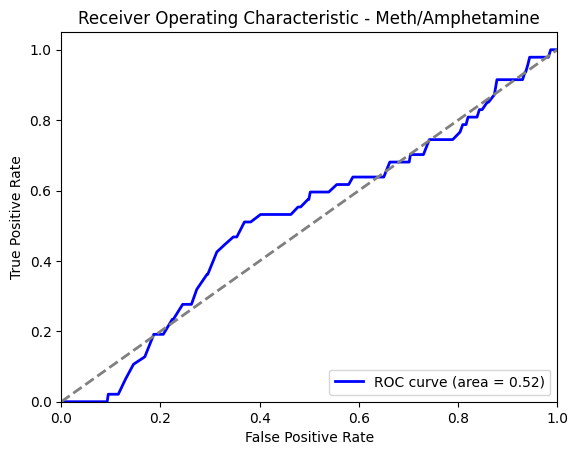


Substance: Amphet
Confusion Matrix for Amphet:
[[2680    0]
 [  80    0]]
Classification Report for Amphet (SVM):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2680
           1       0.00      0.00      0.00        80

    accuracy                           0.97      2760
   macro avg       0.49      0.50      0.49      2760
weighted avg       0.94      0.97      0.96      2760

ROC-AUC Score for Amphet: 0.4713


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


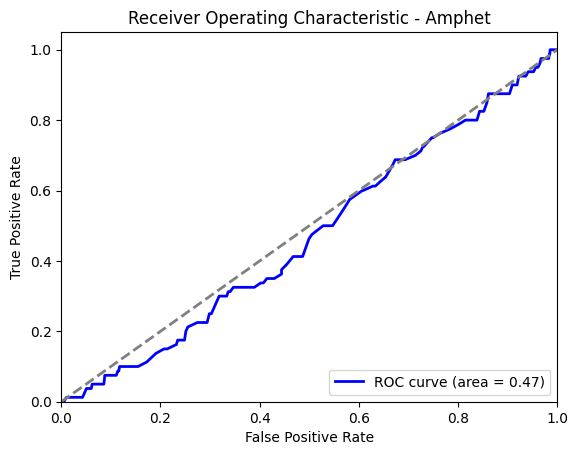


Substance: Tramad
Confusion Matrix for Tramad:
[[2695    0]
 [  65    0]]
Classification Report for Tramad (SVM):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2695
           1       0.00      0.00      0.00        65

    accuracy                           0.98      2760
   macro avg       0.49      0.50      0.49      2760
weighted avg       0.95      0.98      0.96      2760

ROC-AUC Score for Tramad: 0.5186


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


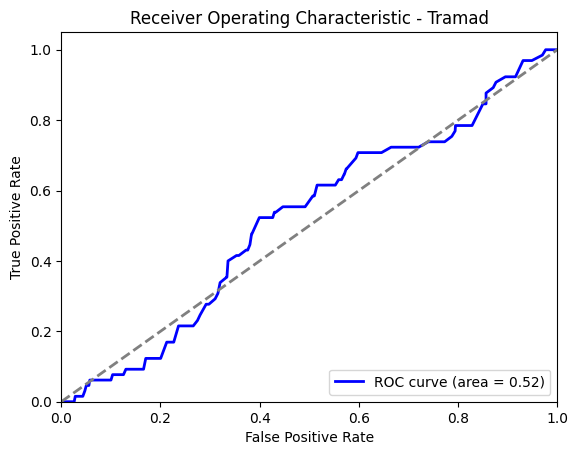


Substance: Hydromorphone
Confusion Matrix for Hydromorphone:
[[2740    0]
 [  20    0]]
Classification Report for Hydromorphone (SVM):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2740
           1       0.00      0.00      0.00        20

    accuracy                           0.99      2760
   macro avg       0.50      0.50      0.50      2760
weighted avg       0.99      0.99      0.99      2760

ROC-AUC Score for Hydromorphone: 0.5103


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


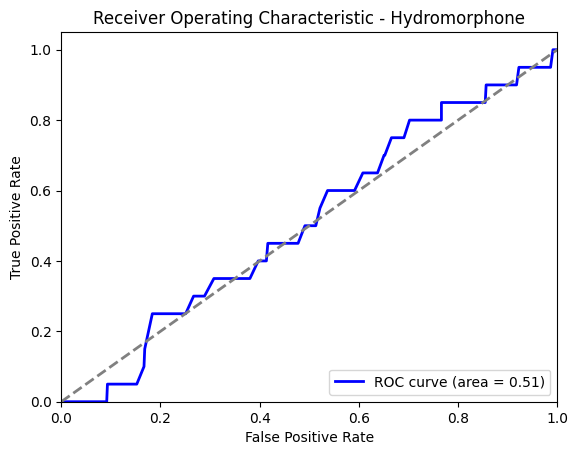


Substance: Morphine (Not Heroin)
Confusion Matrix for Morphine (Not Heroin):
[[2747    0]
 [  13    0]]
Classification Report for Morphine (Not Heroin) (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2747
           1       0.00      0.00      0.00        13

    accuracy                           1.00      2760
   macro avg       0.50      0.50      0.50      2760
weighted avg       0.99      1.00      0.99      2760

ROC-AUC Score for Morphine (Not Heroin): 0.5671


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


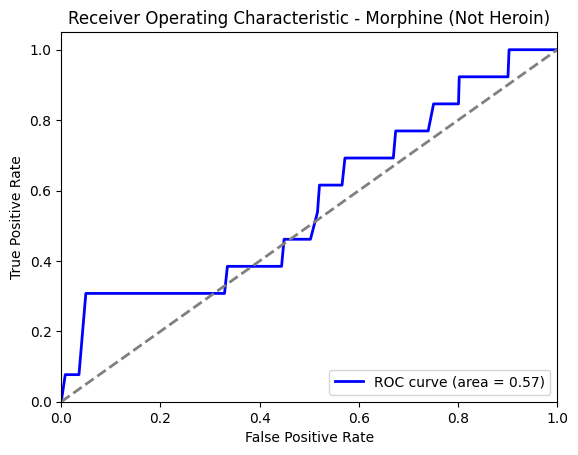


Substance: Xylazine
Confusion Matrix for Xylazine:
[[2630    0]
 [ 130    0]]
Classification Report for Xylazine (SVM):
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2630
           1       0.00      0.00      0.00       130

    accuracy                           0.95      2760
   macro avg       0.48      0.50      0.49      2760
weighted avg       0.91      0.95      0.93      2760

ROC-AUC Score for Xylazine: 0.5188


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


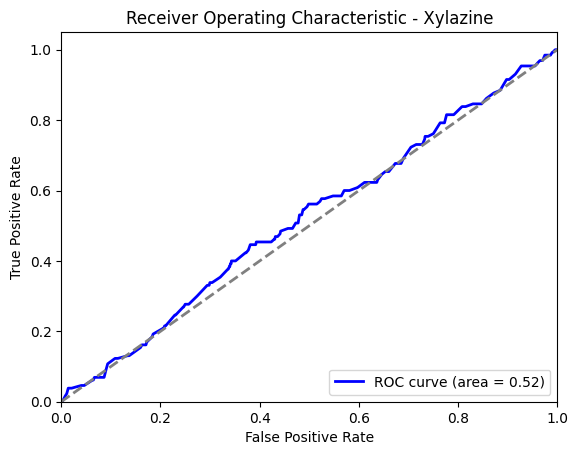


Substance: Gabapentin
Confusion Matrix for Gabapentin:
[[2710    0]
 [  50    0]]
Classification Report for Gabapentin (SVM):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2710
           1       0.00      0.00      0.00        50

    accuracy                           0.98      2760
   macro avg       0.49      0.50      0.50      2760
weighted avg       0.96      0.98      0.97      2760

ROC-AUC Score for Gabapentin: 0.4442


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


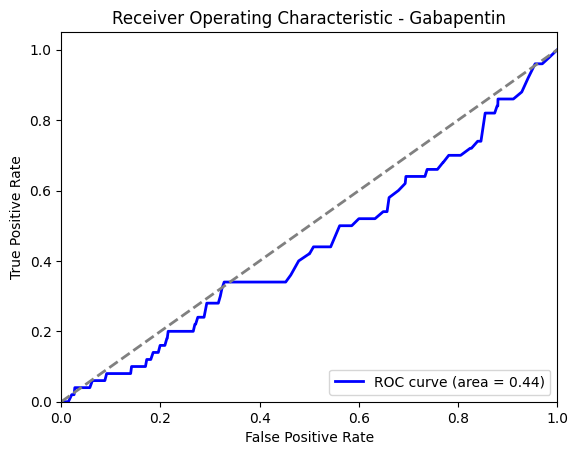


Substance: Opiate NOS
Confusion Matrix for Opiate NOS:
[[2720    0]
 [  40    0]]
Classification Report for Opiate NOS (SVM):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2720
           1       0.00      0.00      0.00        40

    accuracy                           0.99      2760
   macro avg       0.49      0.50      0.50      2760
weighted avg       0.97      0.99      0.98      2760

ROC-AUC Score for Opiate NOS: 0.5417


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


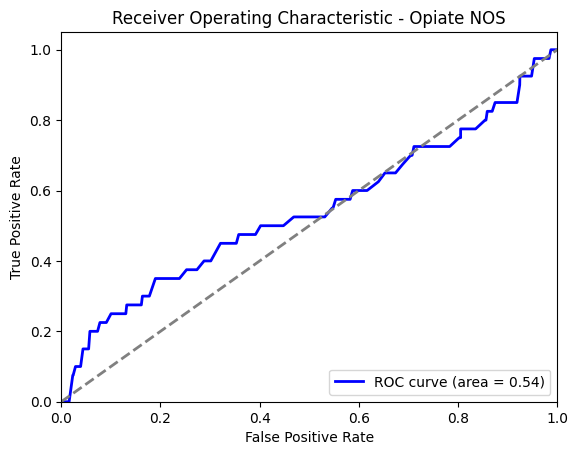


Substance: Heroin/Morph/Codeine
Confusion Matrix for Heroin/Morph/Codeine:
[[2180    0]
 [ 580    0]]
Classification Report for Heroin/Morph/Codeine (SVM):
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2180
           1       0.00      0.00      0.00       580

    accuracy                           0.79      2760
   macro avg       0.39      0.50      0.44      2760
weighted avg       0.62      0.79      0.70      2760



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC-AUC Score for Heroin/Morph/Codeine: 0.4920


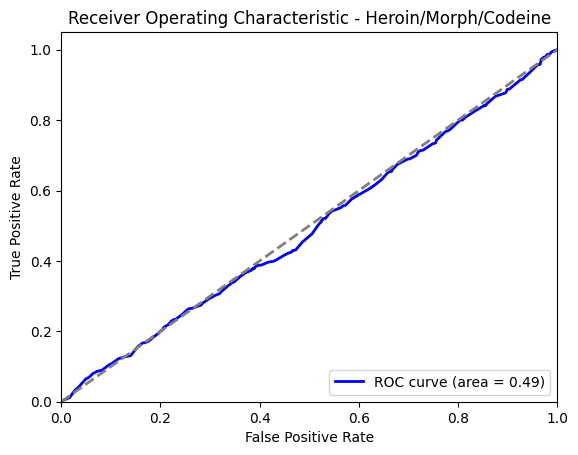


Substance: Other Opioid
Confusion Matrix for Other Opioid:
[[2737    0]
 [  23    0]]
Classification Report for Other Opioid (SVM):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2737
           1       0.00      0.00      0.00        23

    accuracy                           0.99      2760
   macro avg       0.50      0.50      0.50      2760
weighted avg       0.98      0.99      0.99      2760

ROC-AUC Score for Other Opioid: 0.4864


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


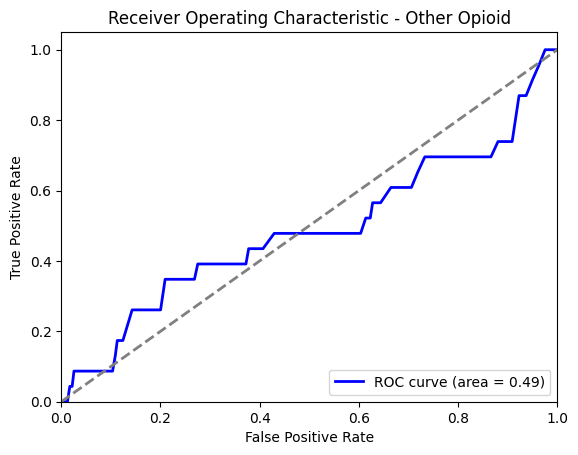

In [181]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Train SVM for each substance and evaluate
for col in substance_columns:
    print(f"\nSubstance: {col}")

    # Define the target (only one column at a time)
    y_train_substance = y_train[col]
    y_test_substance = y_test[col]

    # Check if both classes (0 and 1) are present in y_train_substance
    if len(np.unique(y_train_substance)) < 2:
        print(f"Skipping {col} because only one class is present in the training set.")
        continue

    # Train SVM model for each substance
    svm_model = SVC(probability=True, random_state=42)
    svm_model.fit(X_train_scaled, y_train_substance)

    # Predict on the test set
    y_pred_svm = svm_model.predict(X_test_scaled)

    # Confusion Matrix
    cm = confusion_matrix(y_test_substance, y_pred_svm)
    print(f"Confusion Matrix for {col}:\n{cm}")

    # Classification Report
    print(f"Classification Report for {col} (SVM):")
    print(classification_report(y_test_substance, y_pred_svm))

    # Check if there are at least two classes in the target data for testing
    if len(np.unique(y_test_substance)) > 1:
        # ROC-AUC score
        y_pred_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class
        auc = roc_auc_score(y_test_substance, y_pred_prob_svm)
        print(f"ROC-AUC Score for {col}: {auc:.4f}")

        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_test_substance, y_pred_prob_svm)
        plt.figure()
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {col}')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f"ROC-AUC is not defined for {col} because only one class is present in y_test.")


In [182]:
# Loop through each column in the DataFrame and get the unique values
for col in df_cleaned.columns:
    unique_values = df_cleaned[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print(f"Number of unique values: {len(unique_values)}")
    print('-' * 50)

Unique values in 'Date':
<DatetimeArray>
['2012-05-29 00:00:00', '2012-06-27 00:00:00', '2014-03-24 00:00:00',
 '2014-12-31 00:00:00', '2016-01-16 00:00:00', '2017-06-13 00:00:00',
 '2015-10-20 00:00:00', '2017-02-02 00:00:00', '2018-07-03 00:00:00',
 '2013-05-08 00:00:00',
 ...
 '2021-12-05 00:00:00', '2021-11-30 00:00:00', '2021-12-13 00:00:00',
 '2021-12-23 00:00:00', '2021-11-28 00:00:00', '2021-12-27 00:00:00',
 '2021-12-15 00:00:00', '2021-12-31 00:00:00', '2021-09-21 00:00:00',
 '2021-03-15 00:00:00']
Length: 3162, dtype: datetime64[ns]
Number of unique values: 3162
--------------------------------------------------
Unique values in 'Age':
[37. 28. 26. 41. 57. 64. 33. 23. 54. 45. 21. 48. 30. 49. 39. 44. 42. 43.
 46. 50. 35. 14. 31. 40. 68. 47. 51. 65. 52. 25. 59. 27. 34. 38. 53. 56.
 24. 36. 22. 63. 70. 60. 29. 32. 55. 61. 67. 19. 58. 66. 62. 20. 18. 69.
 73. 72. 71. 16. 74. 17. 77. 75. 80. 15. 78.]
Number of unique values: 65
--------------------------------------------------
U


Substance: Heroin
Skipping Heroin: Only one class present in the target variable.

Substance: Cocaine
Skipping Cocaine: Only one class present in the target variable.

Substance: Fentanyl
Skipping Fentanyl: Only one class present in the target variable.

Substance: Fentanyl Analogue
Confusion Matrix for Fentanyl Analogue:
[[2539    0]
 [ 221    0]]
Classification Report for Fentanyl Analogue (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2539
           1       0.00      0.00      0.00       221

    accuracy                           0.92      2760
   macro avg       0.46      0.50      0.48      2760
weighted avg       0.85      0.92      0.88      2760

ROC-AUC Score for Fentanyl Analogue: 0.5288


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


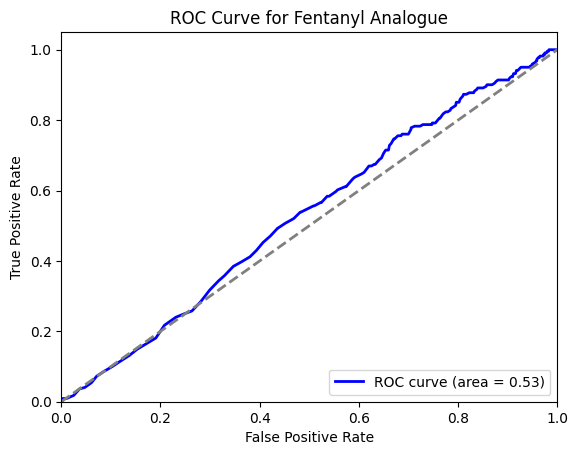


Substance: Oxycodone
Confusion Matrix for Oxycodone:
[[2494    0]
 [ 266    0]]
Classification Report for Oxycodone (Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2494
           1       0.00      0.00      0.00       266

    accuracy                           0.90      2760
   macro avg       0.45      0.50      0.47      2760
weighted avg       0.82      0.90      0.86      2760

ROC-AUC Score for Oxycodone: 0.6430


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


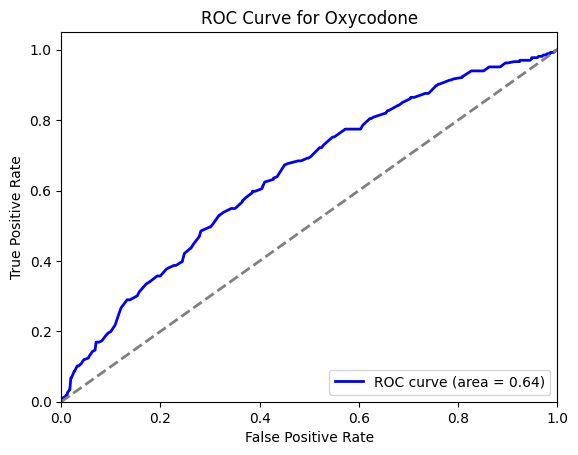


Substance: Oxymorphone
Confusion Matrix for Oxymorphone:
[[2722    0]
 [  38    0]]
Classification Report for Oxymorphone (Logistic Regression):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2722
           1       0.00      0.00      0.00        38

    accuracy                           0.99      2760
   macro avg       0.49      0.50      0.50      2760
weighted avg       0.97      0.99      0.98      2760

ROC-AUC Score for Oxymorphone: 0.5959


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


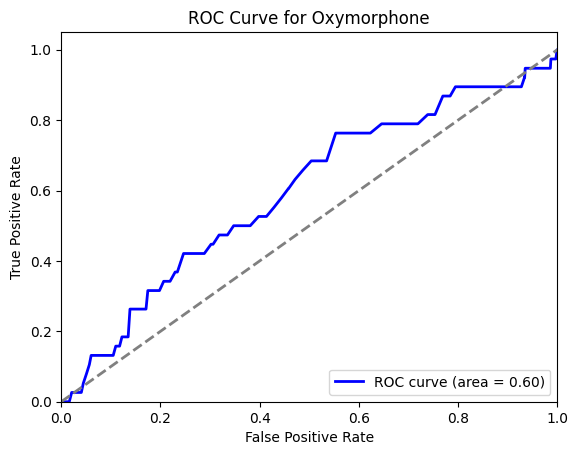


Substance: Ethanol
Confusion Matrix for Ethanol:
[[2012    0]
 [ 748    0]]
Classification Report for Ethanol (Logistic Regression):
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      2012
           1       0.00      0.00      0.00       748

    accuracy                           0.73      2760
   macro avg       0.36      0.50      0.42      2760
weighted avg       0.53      0.73      0.61      2760

ROC-AUC Score for Ethanol: 0.5616


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


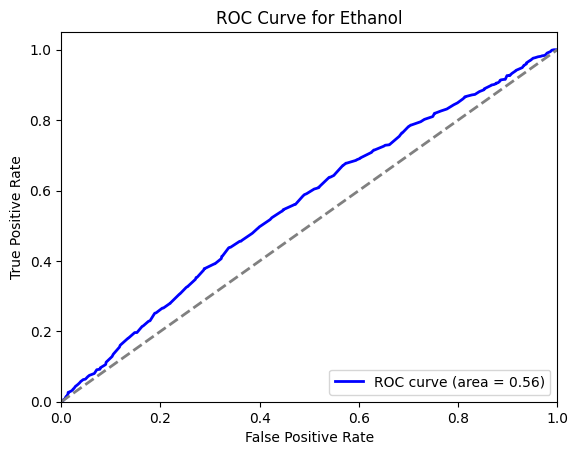


Substance: Hydrocodone
Confusion Matrix for Hydrocodone:
[[2716    0]
 [  44    0]]
Classification Report for Hydrocodone (Logistic Regression):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2716
           1       0.00      0.00      0.00        44

    accuracy                           0.98      2760
   macro avg       0.49      0.50      0.50      2760
weighted avg       0.97      0.98      0.98      2760

ROC-AUC Score for Hydrocodone: 0.6504


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


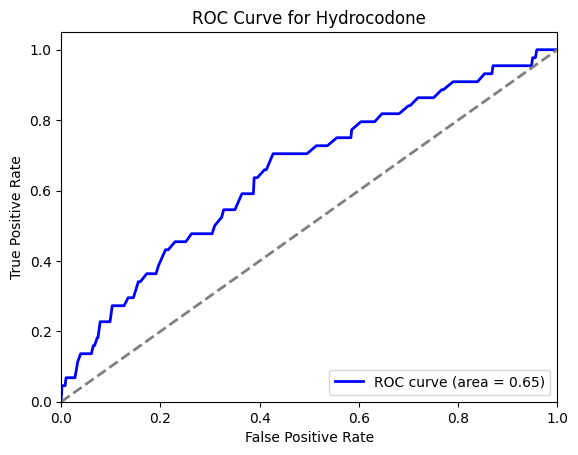


Substance: Benzodiazepine
Confusion Matrix for Benzodiazepine:
[[2093    0]
 [ 667    0]]
Classification Report for Benzodiazepine (Logistic Regression):
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2093
           1       0.00      0.00      0.00       667

    accuracy                           0.76      2760
   macro avg       0.38      0.50      0.43      2760
weighted avg       0.58      0.76      0.65      2760

ROC-AUC Score for Benzodiazepine: 0.6311


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


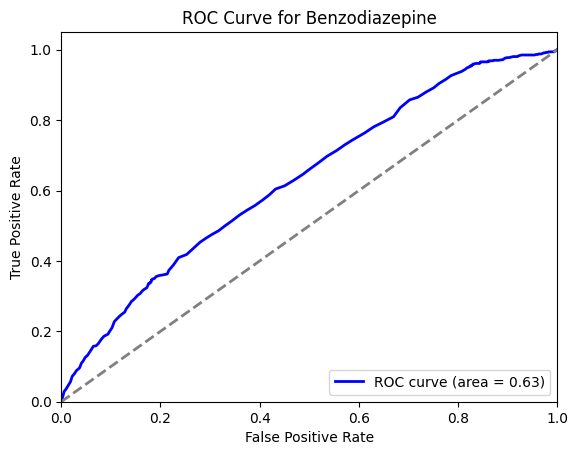


Substance: Methadone
Confusion Matrix for Methadone:
[[2543    0]
 [ 217    0]]
Classification Report for Methadone (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2543
           1       0.00      0.00      0.00       217

    accuracy                           0.92      2760
   macro avg       0.46      0.50      0.48      2760
weighted avg       0.85      0.92      0.88      2760

ROC-AUC Score for Methadone: 0.6242


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


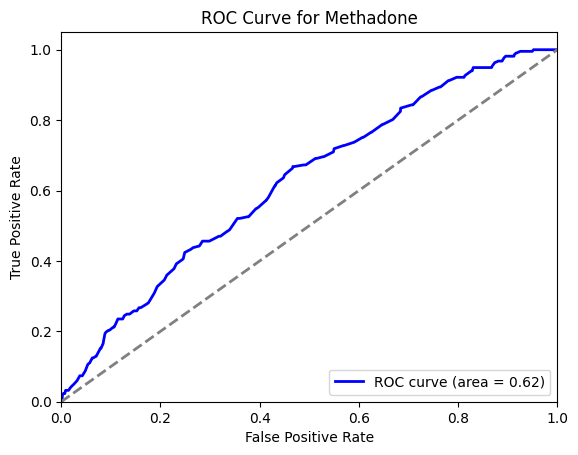


Substance: Meth/Amphetamine
Confusion Matrix for Meth/Amphetamine:
[[2713    0]
 [  47    0]]
Classification Report for Meth/Amphetamine (Logistic Regression):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2713
           1       0.00      0.00      0.00        47

    accuracy                           0.98      2760
   macro avg       0.49      0.50      0.50      2760
weighted avg       0.97      0.98      0.97      2760

ROC-AUC Score for Meth/Amphetamine: 0.5829


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


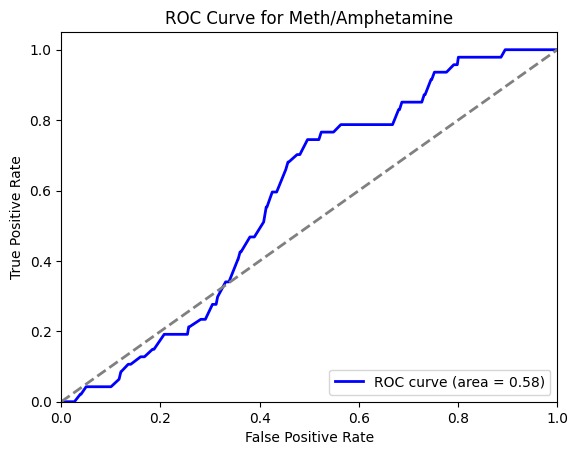


Substance: Amphet
Confusion Matrix for Amphet:
[[2680    0]
 [  80    0]]
Classification Report for Amphet (Logistic Regression):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2680
           1       0.00      0.00      0.00        80

    accuracy                           0.97      2760
   macro avg       0.49      0.50      0.49      2760
weighted avg       0.94      0.97      0.96      2760

ROC-AUC Score for Amphet: 0.5808


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


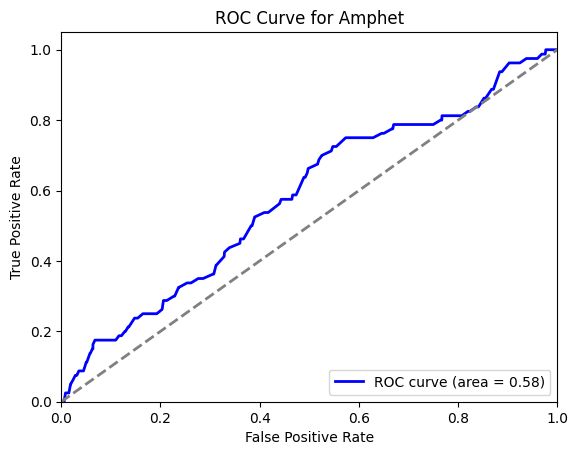


Substance: Tramad
Confusion Matrix for Tramad:
[[2695    0]
 [  65    0]]
Classification Report for Tramad (Logistic Regression):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2695
           1       0.00      0.00      0.00        65

    accuracy                           0.98      2760
   macro avg       0.49      0.50      0.49      2760
weighted avg       0.95      0.98      0.96      2760

ROC-AUC Score for Tramad: 0.5958


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


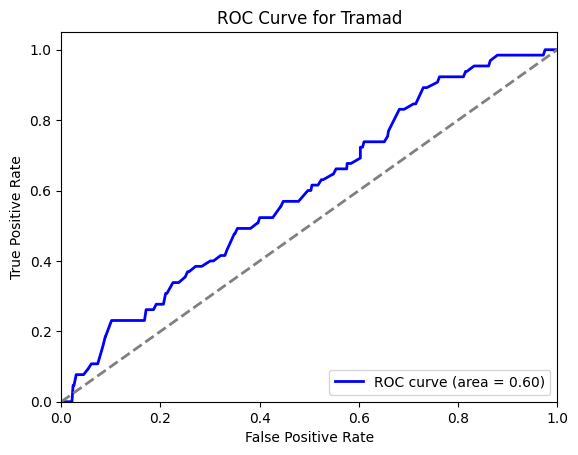


Substance: Hydromorphone
Confusion Matrix for Hydromorphone:
[[2740    0]
 [  20    0]]
Classification Report for Hydromorphone (Logistic Regression):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2740
           1       0.00      0.00      0.00        20

    accuracy                           0.99      2760
   macro avg       0.50      0.50      0.50      2760
weighted avg       0.99      0.99      0.99      2760

ROC-AUC Score for Hydromorphone: 0.5759


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


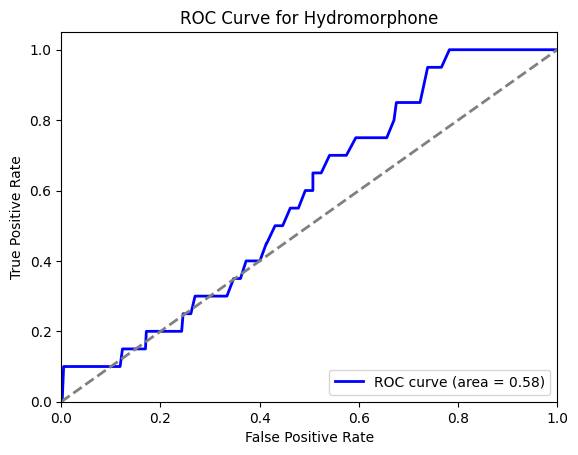


Substance: Morphine (Not Heroin)
Confusion Matrix for Morphine (Not Heroin):
[[2747    0]
 [  13    0]]
Classification Report for Morphine (Not Heroin) (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2747
           1       0.00      0.00      0.00        13

    accuracy                           1.00      2760
   macro avg       0.50      0.50      0.50      2760
weighted avg       0.99      1.00      0.99      2760

ROC-AUC Score for Morphine (Not Heroin): 0.6060


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


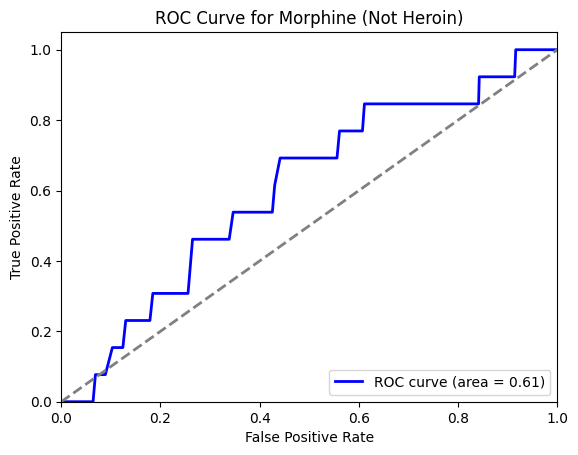


Substance: Xylazine
Confusion Matrix for Xylazine:
[[2630    0]
 [ 130    0]]
Classification Report for Xylazine (Logistic Regression):
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2630
           1       0.00      0.00      0.00       130

    accuracy                           0.95      2760
   macro avg       0.48      0.50      0.49      2760
weighted avg       0.91      0.95      0.93      2760

ROC-AUC Score for Xylazine: 0.5057


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


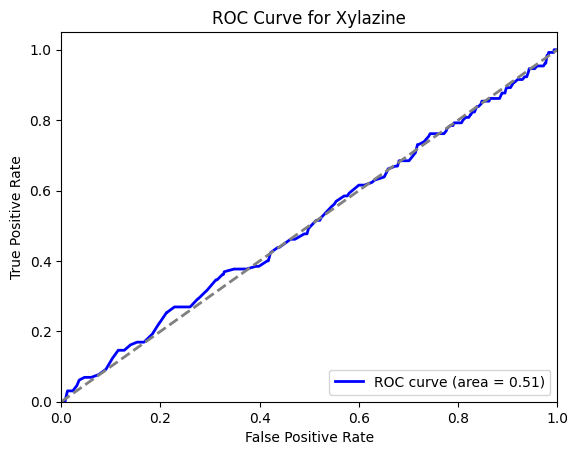


Substance: Gabapentin
Confusion Matrix for Gabapentin:
[[2710    0]
 [  50    0]]
Classification Report for Gabapentin (Logistic Regression):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2710
           1       0.00      0.00      0.00        50

    accuracy                           0.98      2760
   macro avg       0.49      0.50      0.50      2760
weighted avg       0.96      0.98      0.97      2760

ROC-AUC Score for Gabapentin: 0.6531


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


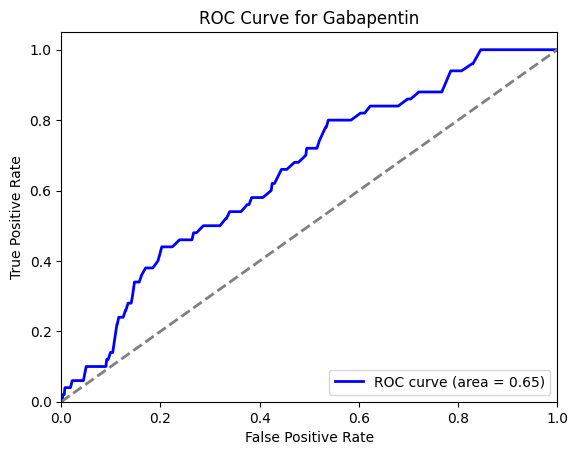


Substance: Opiate NOS
Confusion Matrix for Opiate NOS:
[[2720    0]
 [  40    0]]
Classification Report for Opiate NOS (Logistic Regression):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2720
           1       0.00      0.00      0.00        40

    accuracy                           0.99      2760
   macro avg       0.49      0.50      0.50      2760
weighted avg       0.97      0.99      0.98      2760

ROC-AUC Score for Opiate NOS: 0.6412


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


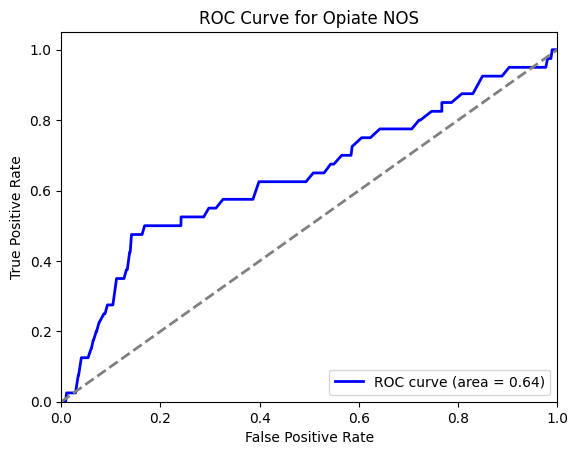


Substance: Heroin/Morph/Codeine
Confusion Matrix for Heroin/Morph/Codeine:
[[2180    0]
 [ 580    0]]
Classification Report for Heroin/Morph/Codeine (Logistic Regression):
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2180
           1       0.00      0.00      0.00       580

    accuracy                           0.79      2760
   macro avg       0.39      0.50      0.44      2760
weighted avg       0.62      0.79      0.70      2760

ROC-AUC Score for Heroin/Morph/Codeine: 0.5381


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


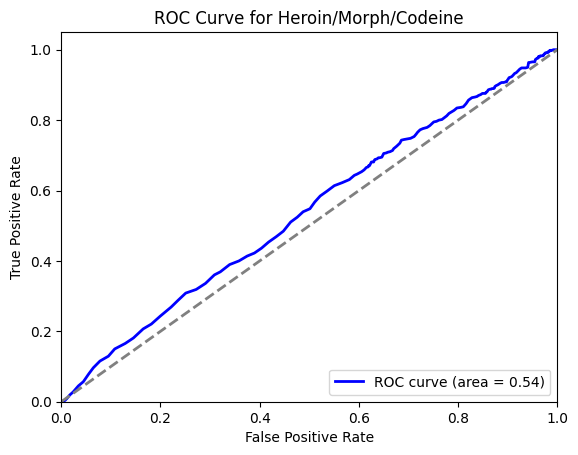


Substance: Other Opioid
Confusion Matrix for Other Opioid:
[[2737    0]
 [  23    0]]
Classification Report for Other Opioid (Logistic Regression):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2737
           1       0.00      0.00      0.00        23

    accuracy                           0.99      2760
   macro avg       0.50      0.50      0.50      2760
weighted avg       0.98      0.99      0.99      2760

ROC-AUC Score for Other Opioid: 0.6528


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


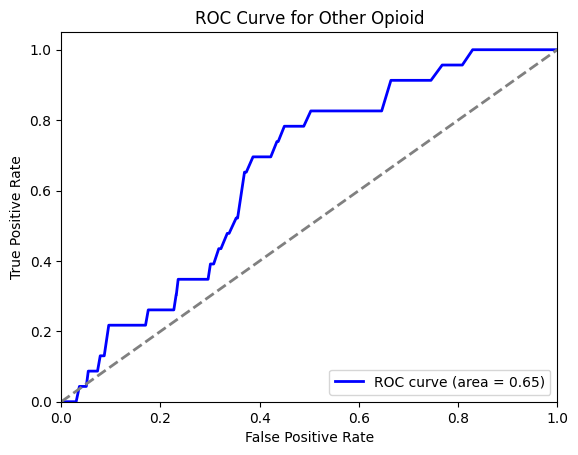


Substance: Any Opioid
Confusion Matrix for Any Opioid:
[[   0  890]
 [   0 1870]]
Classification Report for Any Opioid (Logistic Regression):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       890
           1       0.68      1.00      0.81      1870

    accuracy                           0.68      2760
   macro avg       0.34      0.50      0.40      2760
weighted avg       0.46      0.68      0.55      2760

ROC-AUC Score for Any Opioid: 0.5132


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


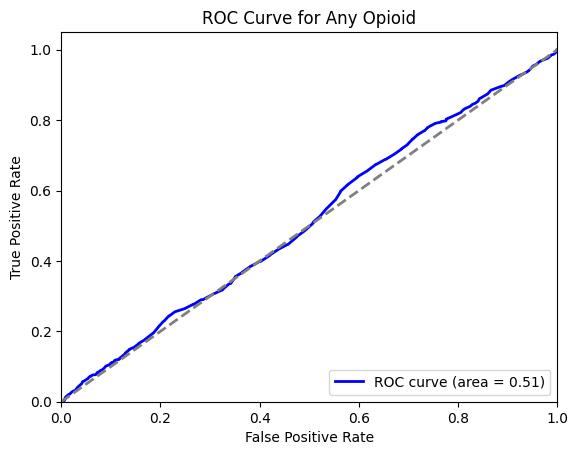

In [183]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# List of substances with binary outcomes (Y/N)
substance_columns = [
    'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone',
    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
    'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
    'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'Other Opioid', 'Any Opioid'
]

# Prepare the feature set (X) and demographic columns for analysis
X = df_cleaned[['Age', 'Sex_Male', 'Race_White']]

# Iterate over each substance and build models
for col in substance_columns:
    print(f"\nSubstance: {col}")

    # Define the target variable for the current substance
    y_substance = df_cleaned[col].replace({'Y': 1, 'N': 0})

    # Ensure that both X and y have the same length
    X_filtered = X.loc[y_substance.index]

    # Check if the target variable has at least two classes
    if len(np.unique(y_substance)) < 2:
        print(f"Skipping {col}: Only one class present in the target variable.")
        continue  # Skip to the next substance

    # Split the data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_substance, test_size=0.3, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train logistic regression model
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = log_reg.predict(X_test_scaled)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {col}:\n{cm}")

    # Classification Report
    print(f"Classification Report for {col} (Logistic Regression):")
    print(classification_report(y_test, y_pred))

    # ROC-AUC Score
    if len(np.unique(y_test)) > 1:  # Ensure there are at least two classes in the test set
        y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, y_pred_prob)
        print(f"ROC-AUC Score for {col}: {auc:.4f}")

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.figure()
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {col}')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f"ROC-AUC is not defined for {col} because only one class is present in y_test.")


Survival Analysis

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           9202 non-null   object 
 1   Date Type                      9202 non-null   object 
 2   Age                            9202 non-null   float64
 3   Sex                            9202 non-null   object 
 4   Race                           9202 non-null   object 
 5   Ethnicity                      9202 non-null   object 
 6   Residence City                 9202 non-null   object 
 7   Residence County               9202 non-null   object 
 8   Residence State                9202 non-null   object 
 9   Injury City                    9202 non-null   object 
 10  Injury County                  9202 non-null   object 
 11  Injury State                   9202 non-null   object 
 12  Injury Place                   9202 non-null   o

<lifelines.CoxPHFitter: fitted with 9202 total observations, 1050 right-censored observations>
             duration col = 'Time_to_Death'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 9202
number of events observed = 8152
   partial log-likelihood = -68500.05
         time fit was run = 2024-09-06 22:12:24 UTC

---
                                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                              
Age                             -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Sex_Male                         0.14       1.15       0.03             0.09             0.19                 1.10                 1.21
Race_Asian Indian               -0.51       0.60       1.03            -2.53             1.51                 0.08                 4.52
Race_Asian, Other               -0.30       0.74       1.02            -2.31             1.71                 0.10                 5.51
Race_Black                      -0.20       0.82       1.00            -2.16             1.76                 0.12                 5.82
Race_Black or African American  -0.01       0.99       1.00            -1.97             1.96                 0.14                 7.09
Race_Chinese                     0.07       1.07       1.22            -2.33             2.47                 0.10                11.83
Race_Hawaiian                    0.03       1.03       1.41            -2.74             2.80                 0.06                16.47
Race_Korean                      0.01       1.01       1.41            -2.76             2.79                 0.06                16.23
Race_Native American, Other    -12.22       0.00     260.98          -523.72           499.28                 0.00            6.86e+216
Race_Other                      -0.16       0.85       1.02            -2.16             1.83                 0.12                 6.26
Race_Other Asian                 0.04       1.04       1.08            -2.08             2.16                 0.13                 8.63
Race_Unknown                    -0.08       0.93       1.01            -2.06             1.91                 0.13                 6.72
Race_White                      -0.29       0.75       1.00            -2.25             1.67                 0.11                 5.30

                                 cmp to     z      p   -log2(p)
covariate                                                      
Age                                0.00 -0.91   0.36       1.46
Sex_Male                           0.00  5.55 <0.005      25.03
Race_Asian Indian                  0.00 -0.49   0.62       0.69
Race_Asian, Other                  0.00 -0.29   0.77       0.38
Race_Black                         0.00 -0.20   0.84       0.25
Race_Black or African American     0.00 -0.01   1.00       0.01
Race_Chinese                       0.00  0.06   0.95       0.07
Race_Hawaiian                      0.00  0.02   0.98       0.02
Race_Korean                        0.00  0.01   0.99       0.01
Race_Native American, Other        0.00 -0.05   0.96       0.05
Race_Other                         0.00 -0.16   0.87       0.20
Race_Other Asian                   0.00  0.04   0.97       0.04
Race_Unknown                       0.00 -0.08   0.94       0.09
Race_White                         0.00 -0.29   0.77       0.38
---
Concordance = 0.57
Partial AIC = 137028.10
log-likelihood ratio test = 65.87 on 14 df
-log2(p) of ll-ratio test = 26.48

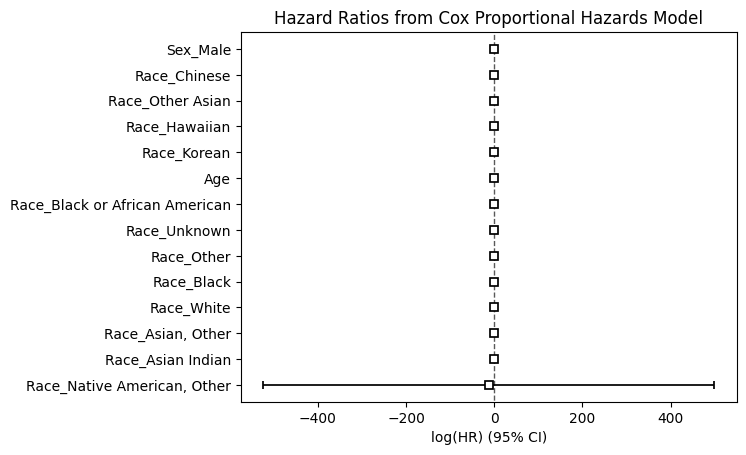

<Figure size 1000x600 with 0 Axes>

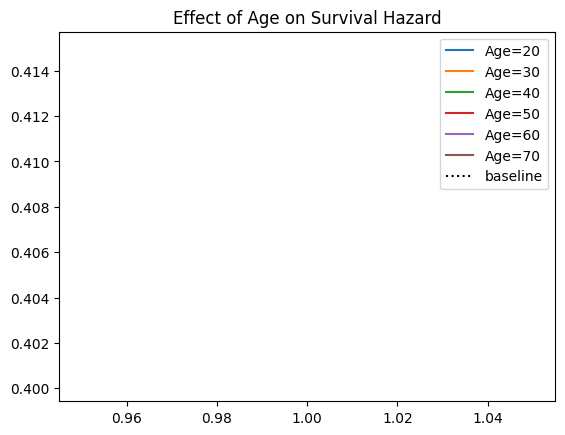

In [193]:
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt



# Step 1: Basic Data Preparation
# Ensure you have 'Time_to_Death', 'Event', and other numeric features (like 'Age')
# Here we assume you already have a 'Time_to_Death' and 'Event' column
# Drop rows with missing values in relevant columns
df_cleaned = df[['Age', 'Sex', 'Race', 'Time_to_Death', 'Event']].dropna()

# Convert categorical variables to numeric using One-Hot Encoding (if necessary)
df_cleaned = pd.get_dummies(df_cleaned, columns=['Sex', 'Race'], drop_first=True)

# Step 2: Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(df_cleaned, duration_col='Time_to_Death', event_col='Event')

# Step 3: Display the summary of the Cox model
cph.print_summary()

# Step 4: Visualize the hazard ratios
cph.plot()
plt.title('Hazard Ratios from Cox Proportional Hazards Model')
plt.show()

# Optional: Visualize partial effects on outcome
plt.figure(figsize=(10, 6))
cph.plot_partial_effects_on_outcome(covariates='Age', values=[20, 30, 40, 50, 60, 70])
plt.title('Effect of Age on Survival Hazard')
plt.show()


<lifelines.CoxPHFitter: fitted with 9202 total observations, 1050 right-censored observations>
             duration col = 'Time_to_Death'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 9202
number of events observed = 8152
   partial log-likelihood = -68508.06
         time fit was run = 2024-09-06 22:13:10 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
Age         -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Sex_Male     0.14       1.15       0.03             0.09             0.19                 1.10                 1.21
Race_White  -0.13       0.87       0.03            -0.20            -0.07                 0.82                 0.93

             cmp to     z      p   -log2(p)
covariate                                  
Age            0.00 -0.76   0.45       1.15
Sex_Male       0.00  5.50 <0.005      24.65
Race_White     0.00 -4.20 <0.005      15.18
---
Concordance = 0.57
Partial AIC = 137022.11
log-likelihood ratio test = 49.86 on 3 df
-log2(p) of ll-ratio test = 33.45

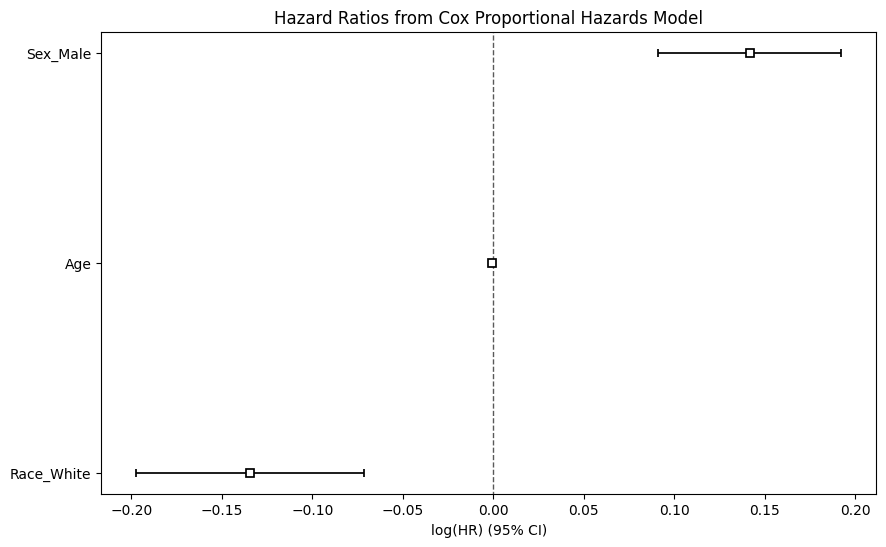

<ipython-input-194-e31c7fc93a05>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_data['Risk_Score'] = cph.predict_partial_hazard(survival_data)


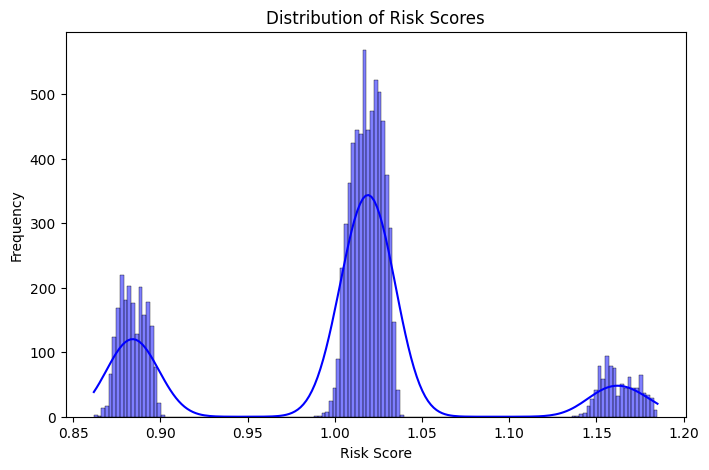

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter
import seaborn as sns

# Step 1: Prepare the data
# Assuming 'df_cleaned' is your cleaned DataFrame with the necessary columns

# Select the columns required for survival analysis
survival_data = df_cleaned[['Age', 'Sex_Male', 'Race_White', 'Time_to_Death', 'Event']]

# Step 2: Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(survival_data, duration_col='Time_to_Death', event_col='Event')

# Step 3: Display model summary
cph.print_summary()

# Step 4: Plot hazard ratios
plt.figure(figsize=(10, 6))
cph.plot()
plt.title('Hazard Ratios from Cox Proportional Hazards Model')
plt.show()

# Step 5: Predict individual risk scores
survival_data['Risk_Score'] = cph.predict_partial_hazard(survival_data)

# Visualize the risk score distribution
plt.figure(figsize=(8, 5))
sns.histplot(survival_data['Risk_Score'], kde=True, color='blue')
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

In [195]:
pip install dash plotly pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 28.1 MB/s eta 0:00:00


In [216]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load your dataset (replace with your actual dataset path)
df = pd.read_csv('/content/test.csv')

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9198 entries, 0 to 9197
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     9198 non-null   int64  
 1   Date                           9198 non-null   object 
 2   Age                            9198 non-null   float64
 3   Sex                            9198 non-null   object 
 4   Race                           9198 non-null   object 
 5   Ethnicity                      9198 non-null   object 
 6   Residence State                9198 non-null   object 
 7   Other Significant Conditions   813 non-null    object 
 8   Heroin                         9198 non-null   object 
 9   Cocaine                        9198 non-null   object 
 10  Fentanyl                       9198 non-null   object 
 11  Fentanyl Analogue              9198 non-null   object 
 12  Oxycodone                      9198 non-null   o

In [223]:
pip install dash-bootstrap-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 5.7 MB/s eta 0:00:00


In [225]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc

# Load your dataset
df = pd.read_csv('/content/test.csv')

# Step 1: Convert 'Date' column to datetime and extract 'Year'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

# Step 2: Clean substance columns by handling special cases and variations
substance_columns = [
    'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone',
    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
    'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
    'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'Other Opioid', 'Any Opioid', 'Other'
]

# Define a function to clean the substance values
def clean_substance_value(value):
    if pd.isna(value):
        return 'N'  # Treat missing values as 'N'
    if isinstance(value, str):
        value = value.strip().upper()  # Normalize case and remove whitespace
        if value.startswith('Y'):
            return 'Y'
        if value.startswith('N'):
            return 'N'
    return 'N'  # Treat all other values as 'N'

# Apply the cleaning function to each substance column
for col in substance_columns:
    df[col] = df[col].apply(clean_substance_value)

# Step 3: Replace 'Y'/'N' in the substance columns with 1/0
for col in substance_columns:
    df[col] = df[col].replace({'Y': 1, 'N': 0}).fillna(0).astype(int)

# Step 4: Create a Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    html.H1("Accidental Drug-Related Deaths Dashboard", style={'textAlign': 'center'}),

    # Dropdown for substance selection
    html.Label("Select a Substance for Risk Scoring:"),
    dcc.Dropdown(
        id='substance-dropdown',
        options=[{'label': substance, 'value': substance} for substance in substance_columns],
        value='Heroin',  # Default value
        clearable=False
    ),

    # Trend graph (line chart)
    dcc.Graph(id='trend-graph'),

    # Button to save the processed data
    html.Button("Save Data to CSV", id="save-button", n_clicks=0),
    html.Div(id="save-confirmation", style={"margin-top": "10px"})
])

# Step 5: Callback to update trend chart
@app.callback(
    Output('trend-graph', 'figure'),
    [Input('substance-dropdown', 'value')]
)
def update_trend_chart(selected_substance):
    # Group data by year and sum the deaths involving the selected substance
    deaths_by_year = df.groupby('Year')[selected_substance].sum().reset_index()

    # Debugging - Log the grouped data
    print(deaths_by_year)

    # Create the line chart
    fig = px.line(deaths_by_year, x='Year', y=selected_substance,
                  title=f'Trend of {selected_substance} Deaths Over Time')

    # Update the layout to avoid label overlaps
    fig.update_layout(
        xaxis_title="Year",
        yaxis_title="Number of Deaths",
        title_x=0.5
    )

    return fig

# Step 6: Callback to save data to CSV
@app.callback(
    Output("save-confirmation", "children"),
    [Input("save-button", "n_clicks")]
)
def save_to_csv(n_clicks):
    if n_clicks > 0:
        # Save the substance counts by year into a CSV file
        deaths_by_year = df.groupby('Year')[substance_columns].sum().reset_index()
        deaths_by_year.to_csv('test.csv', index=False)

        return "Data saved to 'test.csv'!"
    return ""

# Step 7: Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [227]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html, Input, Output

# Load your dataset
df = pd.read_csv('/content/test.csv')

# Step 1: Convert 'Date' column to datetime and extract 'Year'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

# Step 2: Clean substance columns by handling special cases and variations
substance_columns = [
    'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone',
    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
    'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
    'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'Other Opioid', 'Any Opioid', 'Other'
]

def clean_substance_value(value):
    if pd.isna(value):
        return 'N'
    if isinstance(value, str):
        value = value.strip().upper()
        if value.startswith('Y'):
            return 'Y'
        if value.startswith('N'):
            return 'N'
    return 'N'

for col in substance_columns:
    df[col] = df[col].apply(clean_substance_value)

for col in substance_columns:
    df[col] = df[col].replace({'Y': 1, 'N': 0}).fillna(0).astype(int)

# Create a Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Accidental Drug-Related Deaths Dashboard", style={'textAlign': 'center'}),

    # Dropdown for substance selection
    html.Label("Select a Substance for Risk Scoring:"),
    dcc.Dropdown(
        id='substance-dropdown',
        options=[{'label': substance, 'value': substance} for substance in substance_columns],
        value='Heroin',
        clearable=False
    ),

    # Trend graph (line chart)
    dcc.Graph(id='trend-graph'),

    html.Br(),
    html.Hr(),
    html.Br(),

    # State-based choropleth map section
    html.H2("Accidental Deaths by State", style={'textAlign': 'center'}),

    # Dropdown for selecting substance for deaths by state
    html.Label("Select a Substance to Visualize Deaths by State:"),
    dcc.Dropdown(
        id='state-substance-dropdown',
        options=[{'label': substance, 'value': substance} for substance in substance_columns],
        value='Cocaine',
        clearable=False
    ),

    # Choropleth map for deaths by state
    dcc.Graph(id='state-map'),

    # Button to save the processed data
    html.Button("Save Data to CSV", id="save-button", n_clicks=0),
    html.Div(id="save-confirmation", style={"margin-top": "10px"})
])

# Callback to update trend chart
@app.callback(
    Output('trend-graph', 'figure'),
    [Input('substance-dropdown', 'value')]
)
def update_trend_chart(selected_substance):
    deaths_by_year = df.groupby('Year')[selected_substance].sum().reset_index()

    fig = px.line(deaths_by_year, x='Year', y=selected_substance,
                  title=f'Trend of {selected_substance} Deaths Over Time')

    fig.update_layout(
        xaxis_title="Year",
        yaxis_title="Number of Deaths",
        title_x=0.5
    )
    return fig

# Callback to update state-level deaths map
@app.callback(
    Output('state-map', 'figure'),
    [Input('state-substance-dropdown', 'value')]
)
def update_state_map(selected_substance):
    # Group by state and count the number of deaths for the selected substance
    deaths_by_state = df.groupby('Residence State')[selected_substance].sum().reset_index()

    fig = px.choropleth(deaths_by_state,
                        locations='Residence State',
                        locationmode='USA-states',
                        color=selected_substance,
                        hover_name='Residence State',
                        scope='usa',
                        color_continuous_scale='Reds',
                        title=f"Deaths by State for {selected_substance}")

    fig.update_layout(
        geo=dict(
            showcoastlines=True,
            coastlinecolor="Black",
            projection_type="albers usa"
        ),
        title_x=0.5
    )
    return fig

# Callback to save data to CSV
@app.callback(
    Output("save-confirmation", "children"),
    [Input("save-button", "n_clicks")]
)
def save_to_csv(n_clicks):
    if n_clicks > 0:
        deaths_by_year = df.groupby('Year')[substance_columns].sum().reset_index()
        deaths_by_year.to_csv('test.csv', index=False)
        return "Data saved to 'test.csv'!"
    return ""

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>